In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import warnings
from astropy import units as u
import pickle as pk
from pathlib import Path
import sys, os

from astroquery.jplhorizons import Horizons

%matplotlib inline

from atm import modifyErrors
from atm import multiFit
from atm.models import NEATM
from atm.obs import WISE
from atm.analysis import calcMagChi2
from atm.analysis import calcMagReducedChi2
from atm.functions import calcFluxLambdaSED
from atm.plotting import plotObservations
from atm.plotting import plotSED

from asteroid_utils_atm import asteroid, get_desig

%load_ext autoreload
%autoreload 2

/scinet/niagara/software/2019b/opt/base/python/3.8.5/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:

id_num = 0

desig, name, semimajor = get_desig(id_num)
flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'

with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
    vesta_dict = pk.load(f)

ast = asteroid(name, desig, vesta_dict, semimajor = semimajor, show_plot= True,  obs=WISE()) 
ast.add_run('run0') #Model 1

#Run 1/Model2
dataDict = ast.data.copy()
dataDict["eps_W3W4"] = np.ones(len(ast.data)) * 0.9

run1 = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3W4" : ["W3","W4"]},
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" :ast.columnMapping
}

ast.add_run('run1', eps = ['eps_W3W4'], runData = dataDict, runConfig = run1)

#Run 2a #Model 3
dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.70
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.86

run2a = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3" : ["W3"],
                "eps_W4" : ["W4"]},
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run2a', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run2a)
#Run 2b
dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.70
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.86

run2b = {
    "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
    "emissivitySpecification" : "perBand",
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run2b', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run2b)

#Run 3a 
dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.76
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.93

run3a = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3" : ["W3"],
                "eps_W4" : ["W4"]},
   "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run3a', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run3a)
#Run 3b
dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.76
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.93

run3b = {
    "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
    "emissivitySpecification" : "perBand",
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run3b', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run3b)

#Run 4a #Model 4

dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.80
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.98

run4a = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3" : ["W3"],
                "eps_W4" : ["W4"]},
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run4a', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run4a)
#Run 4b #Model 5

dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.80
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.98

run4b = {
    "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
    "emissivitySpecification" : "perBand",
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run4b', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run4b)

#Run 5a

dataDict = ast.data.copy()
dataDict["eps"] = np.ones(len(ast.data)) * 0.9
dataDict["p_W3"] = np.ones(len(ast.data)) * 0.0
dataDict["p_W4"] = np.ones(len(ast.data)) * 0.0

run5a = {
    "fitParameters" : ["logT1", "logD", "p_W1W2"],
    "emissivitySpecification" : None,
    "albedoSpecification": {
                "p_W1W2" : ["W1", "W2"],
                "p_W3" : ["W3"],
                "p_W4" : ["W4"]},
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('run5a', p = ['p_W3', 'p_W4'], eps = 'eps', runData = dataDict, runConfig = run5a)
#Run 5b

dataDict = ast.data.copy()
dataDict["eps"] = np.ones(len(ast.data)) * 0.9
dataDict["p_W3"] = np.ones(len(ast.data)) * 0.0
dataDict["p_W4"] = np.ones(len(ast.data)) * 0.0

run5b = {
    "fitParameters" : ["logT1", "logD", "p_W1W2"],
    "emissivitySpecification" : None,
    "albedoSpecification": {
                "p_W1W2" : ["W1", "W2"],
                "p_W3" : ["W3"],
                "p_W4" : ["W4"]},
    "fitFilters" : ["W1", "W3", "W4"],
    "columnMapping" : ast.columnMapping
}

ast.add_run('run5b', p = ['p_W3', 'p_W4'], eps = 'eps', runData = dataDict, runConfig = run5b)

ast.atm_fit()
ast.make_SED(write = True)
#ast.load_SEDs()
ast.normalize_act_fluxes(verbose = True)
ast.plt_SEDs(spectral = 'lambda4', verbose = False, subplot = None, for_pub=True)
print(name)

for code in ast.dataDict.keys():
        flux = ast.eval_SED(ast.semimajor, ast.semimajor, [0.00333103, 0.00199862, 0.00136269], code, normalize = True)
        
        print(code, flux)

Calculating number of fits to run...
Fit code: run0
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run0/atm_results_run0.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run1
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run1/atm_results_run1.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run2a
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run2a/atm_results_run2a.db).
Objects previously fitted: 1
Removing incomplete fit

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
name = 'Diotima'

with open('asteroids.pk', 'rb') as f:
        #open the pickle that contains all this info. You can also do this via querries to MPL but there's no 
        #internet on compute nodes so I saved all the relevant stuff
        df = pk.load(f)

#Find the index (not MPL designation) where the asteroid name array == name
idx = np.where((df['name'] == name))[0]

#Return the designation by indexing the designation array at the same spot
desig = df['designation'][idx]
print(desig)

## For Publication

Diotima
Calculating number of fits to run...
Fit code: NEOWISE
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Diotima_WISE/NEOWISE/atm_results_NEOWISE.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Total number of fits to run: 0

No fits to run.
[  designation  model     code parameter  median  sigmaG   mean     sd  hdi_3%  \
0         423  NEATM  NEOWISE     logT1   2.594   0.003  2.594  0.003   2.589   
1         423  NEATM  NEOWISE      logD   5.264   0.011  5.264  0.011   5.244   
2         423  NEATM  NEOWISE    p_W1W2   0.066   0.004  0.066  0.004   0.058   

   hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  ess_bulk  ess_tail  r_hat  
0    2.600      0.000      0.0     435.0   435.0     439.0    1820.0   1.04  
1    5.285      0.001      0.0 

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/plotting/fluxes.py:85: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.errorbar(obs.filterEffectiveLambdas[i] * m_to_mum, y, yerr = yerr,
/gpfs/fs1/home/r/rbond/jorlo/dev/minorplanets/asteroid_utils_atm.py:457: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  a.set_xticks([1e3, 2e3, 4e3], [1e3, 2e3, 4e3])


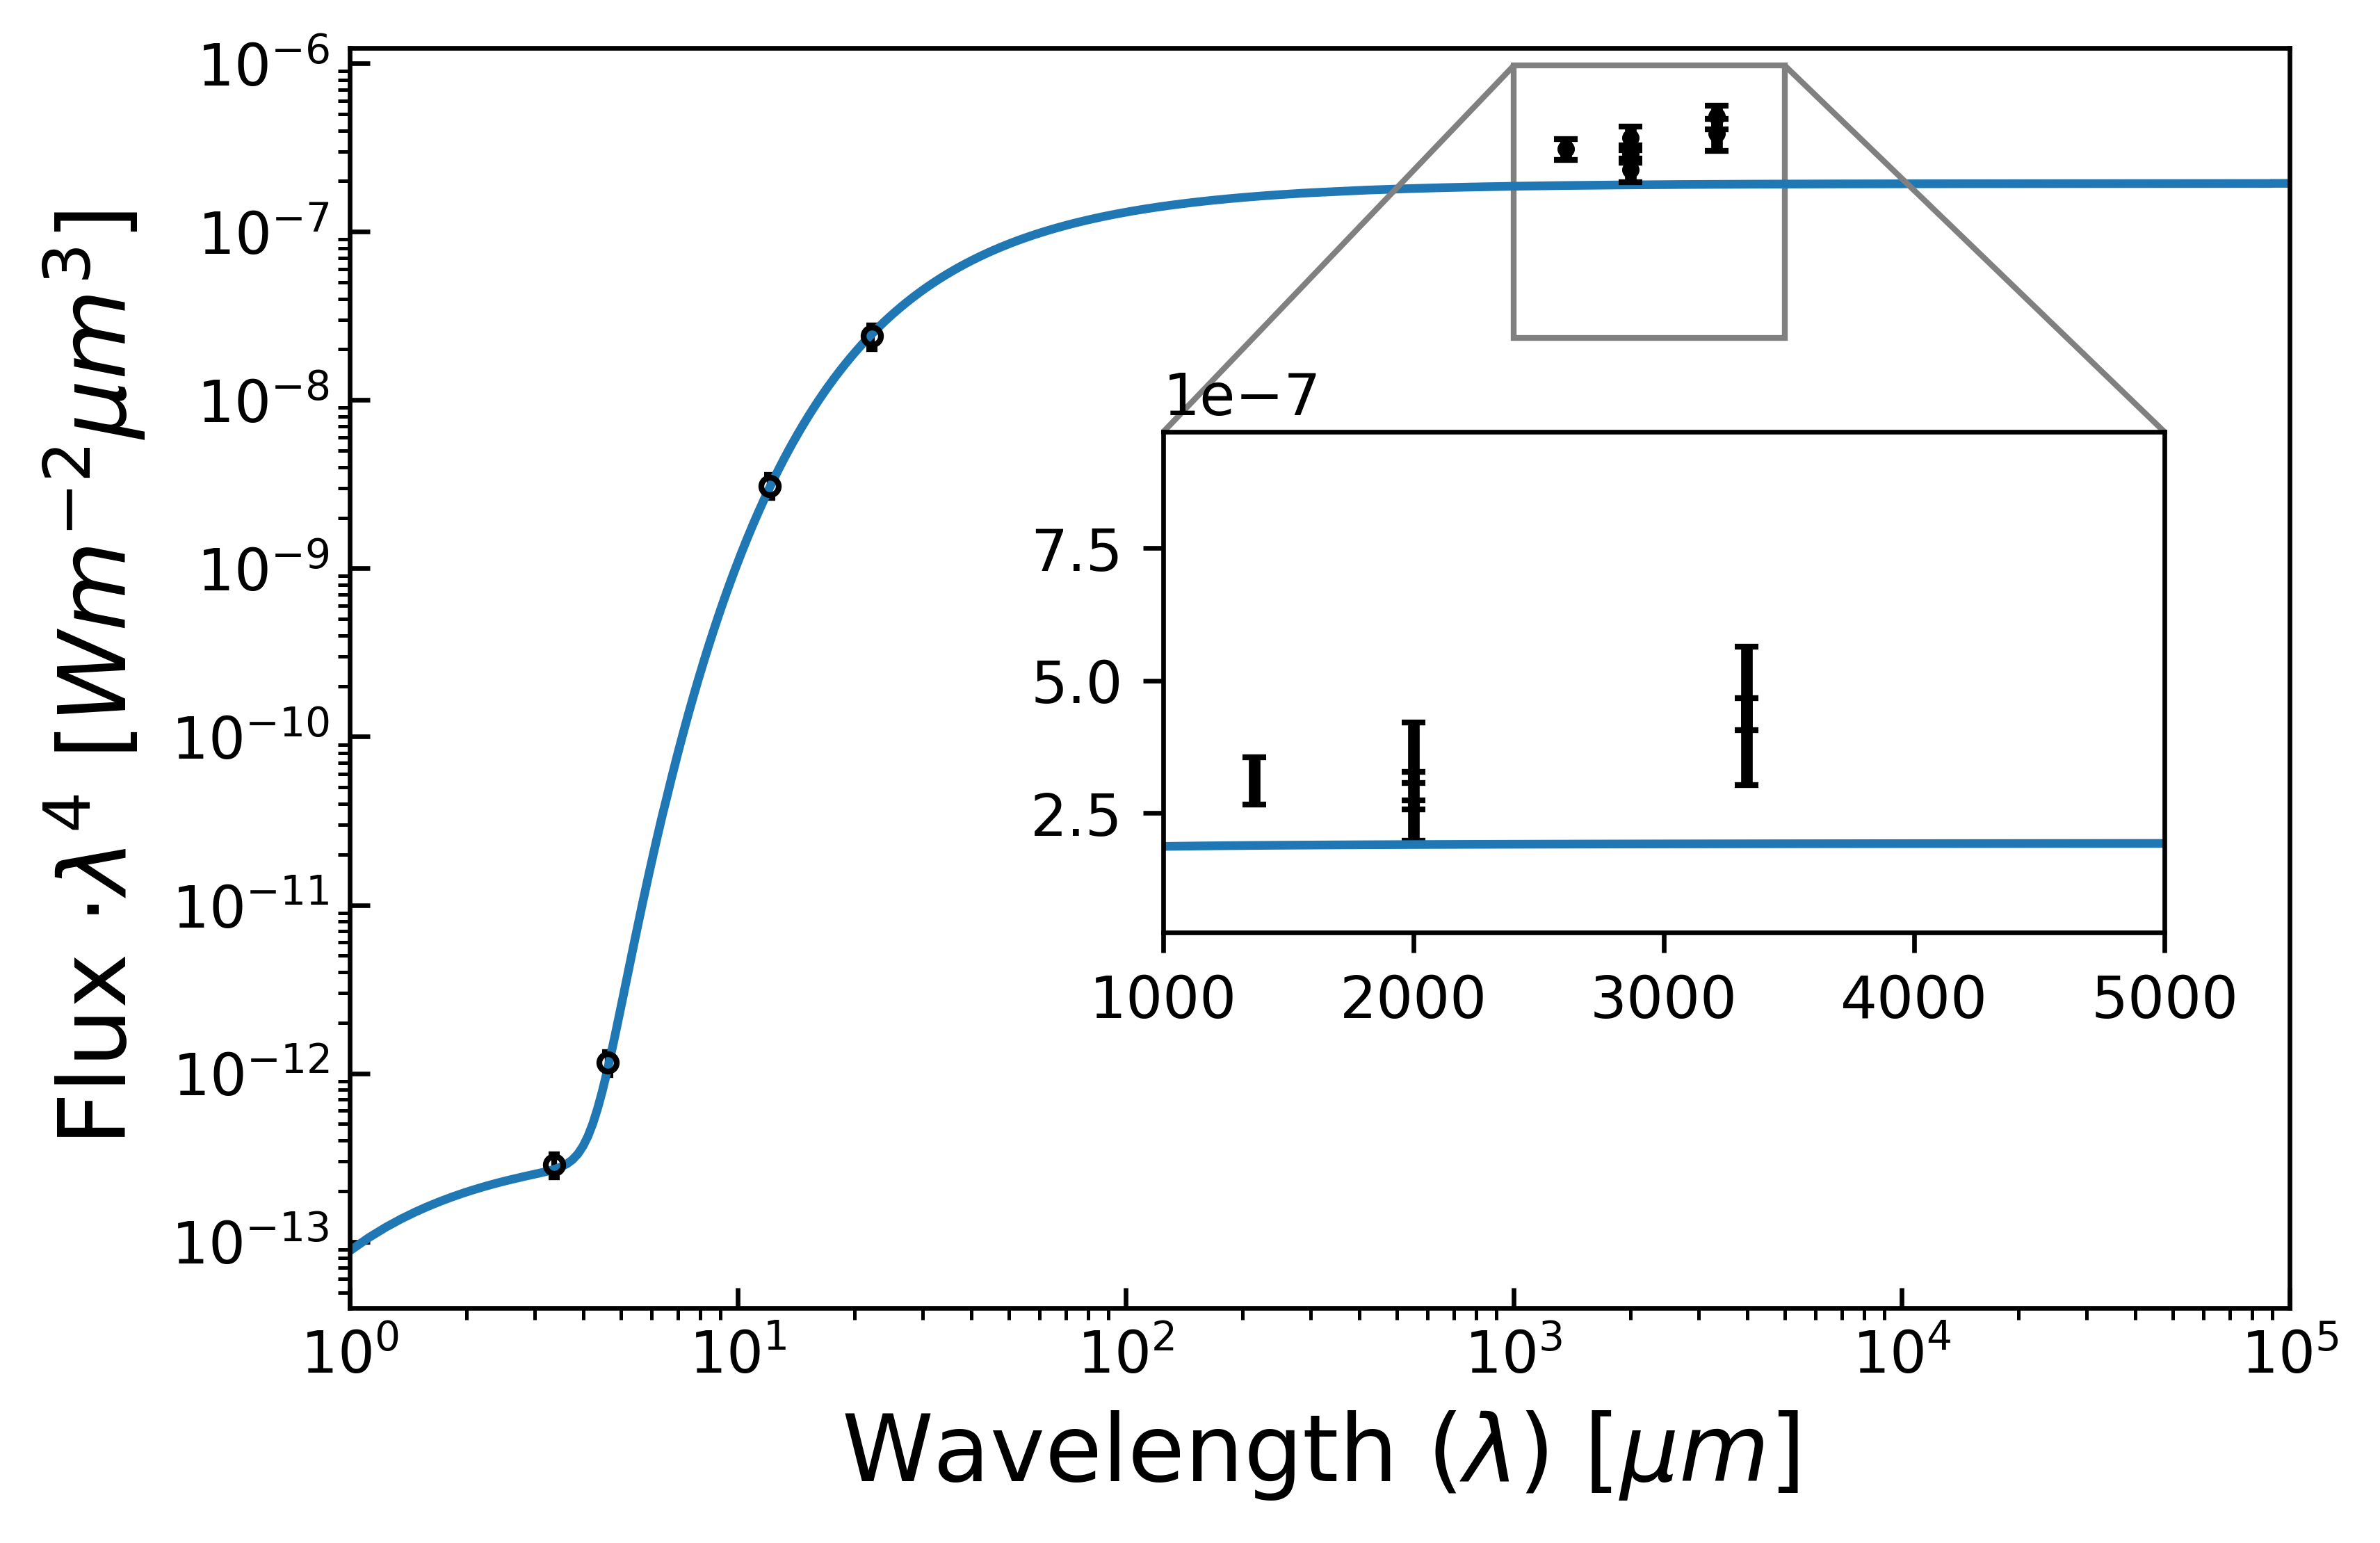

In [4]:
id_num = 107

desig, name, semimajor = get_desig(id_num)
flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
print(name)


####################################################################
#              Uncomment "add_run"s to plot the runs               #
####################################################################

with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
    vesta_dict = pk.load(f)

ast = asteroid(name, desig, vesta_dict, semimajor = semimajor, show_plot= True,  obs=WISE()) 
#ast.add_run('Model 1')
"""
#Run 1
dataDict = ast.data.copy()
dataDict["eps_W3W4"] = np.ones(len(ast.data)) * 0.9

run1 = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3W4" : ["W3","W4"]},
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" :ast.columnMapping
}

#ast.add_run('Model 2', eps = ['eps_W3W4'], runData = dataDict, runConfig = run1)

#Run 2a
dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.70
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.86

run2a = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3" : ["W3"],
                "eps_W4" : ["W4"]},
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

#ast.add_run('Model 3', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run2a)


#

#Run 4a

dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.80
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.98

run4a = {
    "fitParameters" : ["logT1", "logD", "eps_W1W2"],
    "emissivitySpecification" : {
                "eps_W1W2" : ["W1","W2"],
                "eps_W3" : ["W3"],
                "eps_W4" : ["W4"]},
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

#ast.add_run('Model 4', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run4a)
#Run 4b

dataDict = ast.data.copy()
dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.80
dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.98

run4b = {
    "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
    "emissivitySpecification" : "perBand",
    "albedoSpecification": "auto",
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

#ast.add_run('Model 5', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run4b)

#Run 5a
"""
dataDict = ast.data.copy()
dataDict["eps"] = np.ones(len(ast.data)) * 0.9
dataDict["p_W3"] = np.ones(len(ast.data)) * 0.0
dataDict["p_W4"] = np.ones(len(ast.data)) * 0.0

run5a = {
    "fitParameters" : ["logT1", "logD", "p_W1W2"],
    "emissivitySpecification" : None,
    "albedoSpecification": {
                "p_W1W2" : ["W1", "W2"],
                "p_W3" : ["W3"],
                "p_W4" : ["W4"]},
    "fitFilters" : "all",
    "columnMapping" : ast.columnMapping
}

ast.add_run('NEOWISE', p = ['p_W3', 'p_W4'], eps = 'eps', runData = dataDict, runConfig = run5a)
#Run 5b


ast.atm_fit()
#ast.make_SED(write = True, lambdaNum=2500)
ast.load_SEDs()
ast.normalize_act_fluxes(write = False, verbose = False)
ast.plt_SEDs(spectral = 'lambda4', verbose = False, subplot = None, for_pub=True)


In [6]:
ast.eval_SED(np.mean(ast.data['r_au'].to_numpy()), np.mean(ast.data['delta_au'].to_numpy()), 
             [0.00333103, 0.00199862, 0.00136269], 'NEOWISE', normalize = 'spt', verbose = True)

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

Make SED weight:  7.656217861587788


array([ 763.06099143, 2106.40267222, 4498.15247584])

In [25]:
#act_keys = ['flux_150PA4_si', 'flux_150PA5_si', 'flux_150PA6_si','fluxErr_150PA4_si', 'fluxErr_150PA5_si', 'fluxErr_150PA6_si']

r_sun = np.mean(ast.data['r_au'].to_numpy())
r_earth = np.mean(ast.data['delta_au'].to_numpy())

factor = np.sqrt(r_sun)*r_earth**2

for pa_key in ast.act_flux_dict['night'].keys():
    for freq_key in ast.act_flux_dict['night'][pa_key].keys():
        ast.act_flux_dict['night'][pa_key][freq_key]['flux'] = ast.act_flux_dict['night'][pa_key][freq_key]['flux'] / factor
        ast.act_flux_dict['night'][pa_key][freq_key]['var'] = ast.act_flux_dict['night'][pa_key][freq_key]['var'] / factor
print(ast.act_flux_dict['night'])    

{'pa4': {'150': {'flux': 105.54023540997423, 'var': 3.039224426512575}, '220': {'flux': 199.51406902242402, 'var': 4.89574830423451}}, 'pa5': {'090': {'flux': 47.72346183489494, 'var': 1.5298378518115245}, '150': {'flux': 104.56524985850047, 'var': 1.9897601330718317}}, 'pa6': {'090': {'flux': 48.6373591932569, 'var': 1.5264717118388145}, '150': {'flux': 102.27101401733454, 'var': 1.905532378245924}}}


In [24]:
ast.act_flux_dict['night']

{'pa4': {'150': {'flux': array(637.3841, dtype=float32),
   'var': 18.35464267020674},
  '220': {'flux': array(1204.9158, dtype=float32), 'var': 29.56665850129618}},
 'pa5': {'090': {'flux': array(288.21402, dtype=float32),
   'var': 9.239076544793965},
  '150': {'flux': array(631.4959, dtype=float32), 'var': 12.0166631734609}},
 'pa6': {'090': {'flux': array(293.73328, dtype=float32),
   'var': 9.218747576706575},
  '150': {'flux': array(617.64044, dtype=float32), 'var': 11.507990523538407}}}

In [6]:
ast.data

,obs_id,designation,r_au,delta_au,alpha_deg,H_mag,G,mjd,flux_W1_si,fluxErr_W1_si,...,flux_150PA4_si,flux_150PA5_si,flux_150PA6_si,flux_220PA4_si,fluxErr_090PA5_si,fluxErr_090PA6_si,fluxErr_150PA4_si,fluxErr_150PA5_si,fluxErr_150PA6_si,fluxErr_220PA4_si
54192,54193,4,2.314689,1.987373,25.7343,3.2,0.32,55327.044366,5.156616e-07,9.403850e-08,...,4.783673e-13,4.739481e-13,4.635493e-13,1.945285e-12,2.496274e-15,2.490781e-15,1.377546e-14,9.018704e-15,8.636937e-15,4.773411e-14
54193,54194,4,2.314428,1.990280,25.7480,3.2,0.32,55327.308975,4.839103e-07,9.003096e-08,...,4.783673e-13,4.739481e-13,4.635493e-13,1.945285e-12,2.496274e-15,2.490781e-15,1.377546e-14,9.018704e-15,8.636937e-15,4.773411e-14
54194,54195,4,2.314363,1.991006,25.7514,3.2,0.32,55327.375063,5.384741e-07,1.155570e-07,...,4.783673e-13,4.739481e-13,4.635493e-13,1.945285e-12,2.496274e-15,2.490781e-15,1.377546e-14,9.018704e-15,8.636937e-15,4.773411e-14
54195,54196,4,2.313972,1.995369,25.7712,3.2,0.32,55327.771975,5.194752e-07,8.899251e-08,...,4.783673e-13,4.739481e-13,4.635493e-13,1.945285e-12,2.496274e-15,2.490781e-15,1.377546e-14,9.018704e-15,8.636937e-15,4.773411e-14
54196,54197,4,2.313711,1.998278,25.7840,3.2,0.32,55328.036584,5.633325e-07,1.011754e-07,...,4.783673e-13,4.739481e-13,4.635493e-13,1.945285e-12,2.496274e-15,2.490781e-15,1.377546e-14,9.018704e-15,8.636937e-15,4.773411e-14


In [107]:
for code in ast.dataDict.keys():
    fluxes = ast.eval_SED(ast.semimajor, ast.semimajor, [0.00333103, 0.00199862, 0.00136269], code)
    print(fluxes)

[12.14647846 33.52202022 71.56539662]
[11.58123304 31.96395577 68.24389251]
[11.74879361 32.42545458 69.2267914 ]
[ 9.32308705 25.7532732  55.03836815]
[11.56172822 31.91153951 68.13552616]
[ 9.34436783 25.81238899 55.16553683]
[11.96090318 33.01330189 70.48793814]
[ 9.42503637 26.03488763 55.64021433]
[12.1258505  33.46508858 71.44384877]
[ 9.93367773 27.43192788 58.60590487]


In [88]:
wise_fluxes = ast.eval_SED(ast.semimajor, ast.semimajor, [0.00333103, 0.00199862, 0.00136269], 'run5a')
print(wise_fluxes)
wise_freqs = np.array([0.00333103, 0.00199862, 0.00136269])*u.m


[1.88789010e-14 1.44752988e-13 6.64896267e-13] W / (Hz m2)


In [4]:
with open('/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Vesta_flux_dict.pk', 'rb') as f:
    flux_dict = pk.load(f)
    

In [5]:
flux_pa4_150 = flux_dict['pa4']['150']['flux']
flux_pa4_220 = flux_dict['pa4']['220']['flux']

flux_pa5_090 = flux_dict['pa5']['090']['flux']
flux_pa5_150 = flux_dict['pa5']['150']['flux']

flux_pa6_090 = flux_dict['pa6']['090']['flux']
flux_pa6_150  = flux_dict['pa6']['150']['flux']

act_fluxes = [flux_pa5_090, flux_pa6_090, flux_pa4_150, flux_pa5_150, flux_pa6_150, flux_pa4_220]*u.mJy
act_freqs = np.array([0.00333103, 0.00333103, 0.00199862, 0.00199862, 0.00199862, 0.00136269])*u.m

act_flux_units = np.zeros(len(act_fluxes))
for i in range(len(act_fluxes)):
    act_flux_units[i] = ((2.99792458e+14 * act_fluxes[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)
act_flux_units = act_flux_units*u.W*u.m**-2*u.Hz**-1

In [6]:
act_flux_units.to(u.mJy) / 2.99792458e+14 * (act_freqs.to(u.um)**2).value

<Quantity [ 63.98758698,  87.33355713, 142.25004578, 133.3830719 ,
           181.96250916, 246.57354736] mJy>

In [7]:
act_fluxes

<Quantity [ 63.987587,  87.33356 , 142.25005 , 133.38307 , 181.96251 ,
           246.57355 ] mJy>

In [94]:
wise_fluxes.to(u.mJy) / 2.99792458e+14 * (wise_freqs.to(u.um)**2).value*1e-6

<Quantity [ 69.87359614, 192.87116054, 411.83886582] mJy>

In [68]:



fluxes*1e-6/u.um

<Quantity [1.88789010e-20, 1.44752988e-19, 6.64896267e-19] W / (Hz m2 um)>

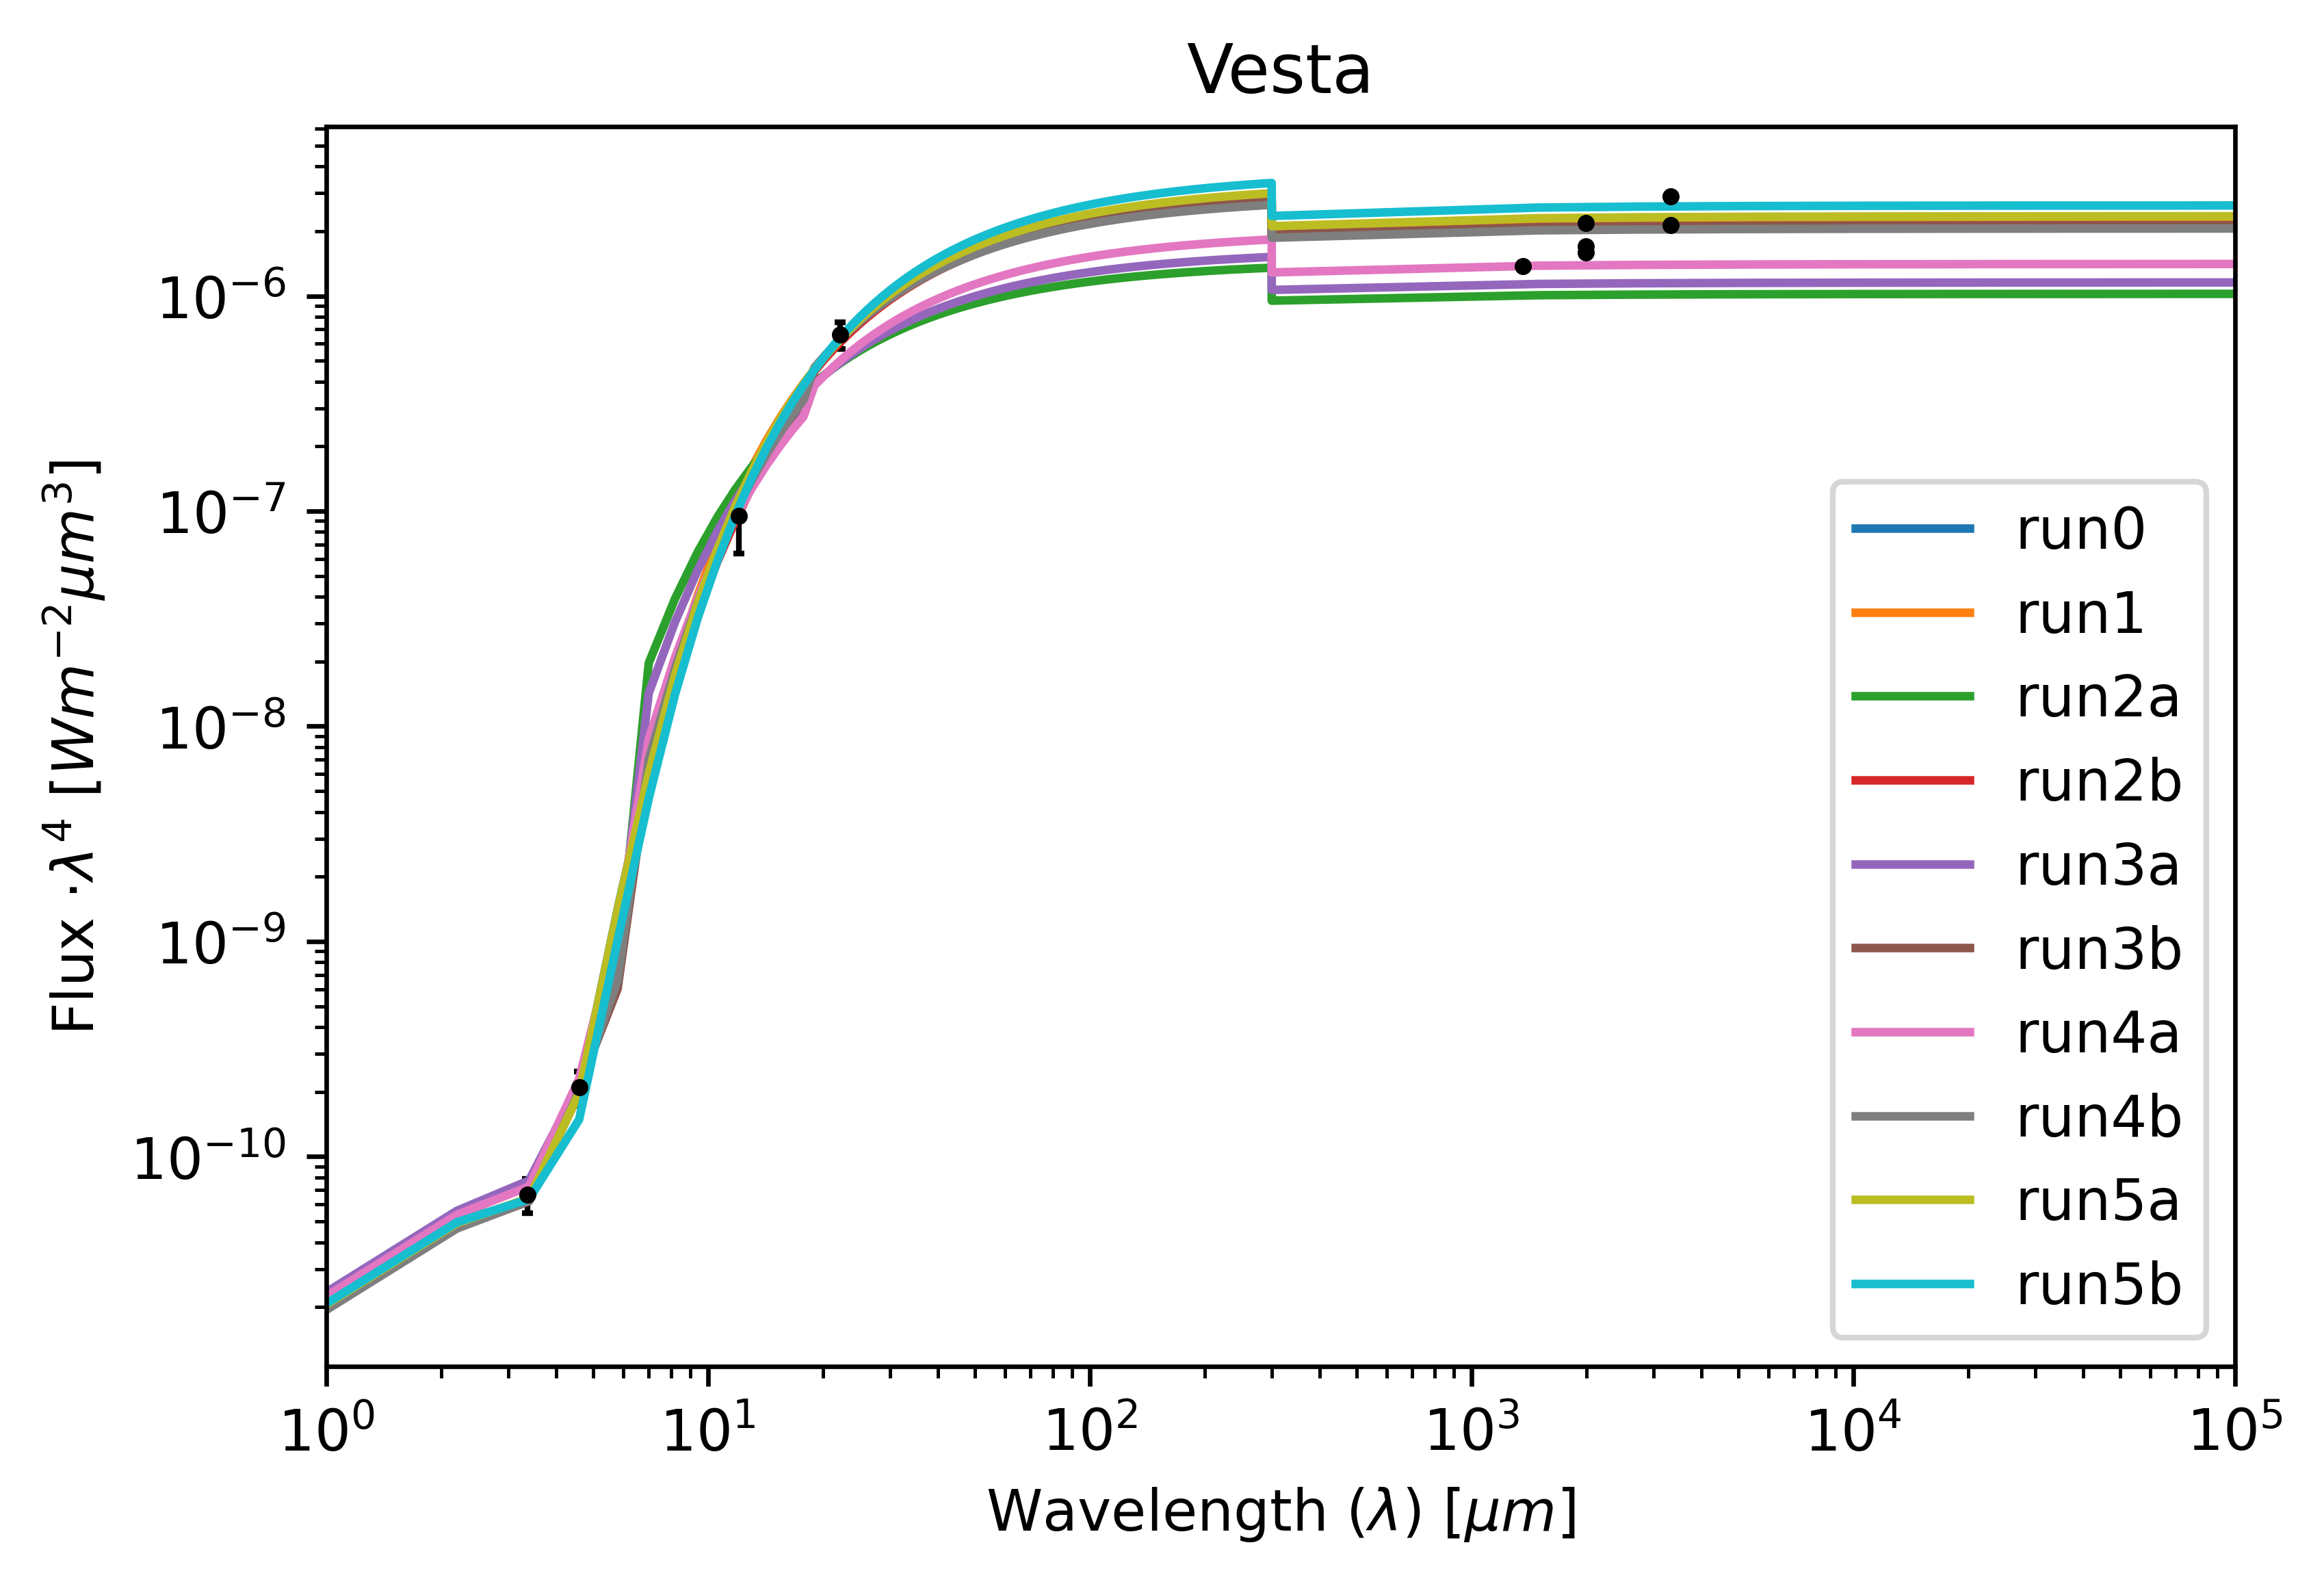

In [9]:
ast.plt_SEDs(spectral = 'bbody')


Calculating number of fits to run...
Fit code: run0
Found existing results database (2/run0/atm_results_run0.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run1
Found existing results database (2/run1/atm_results_run1.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run2a
Found existing results database (2/run2a/atm_results_run2a.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit co

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

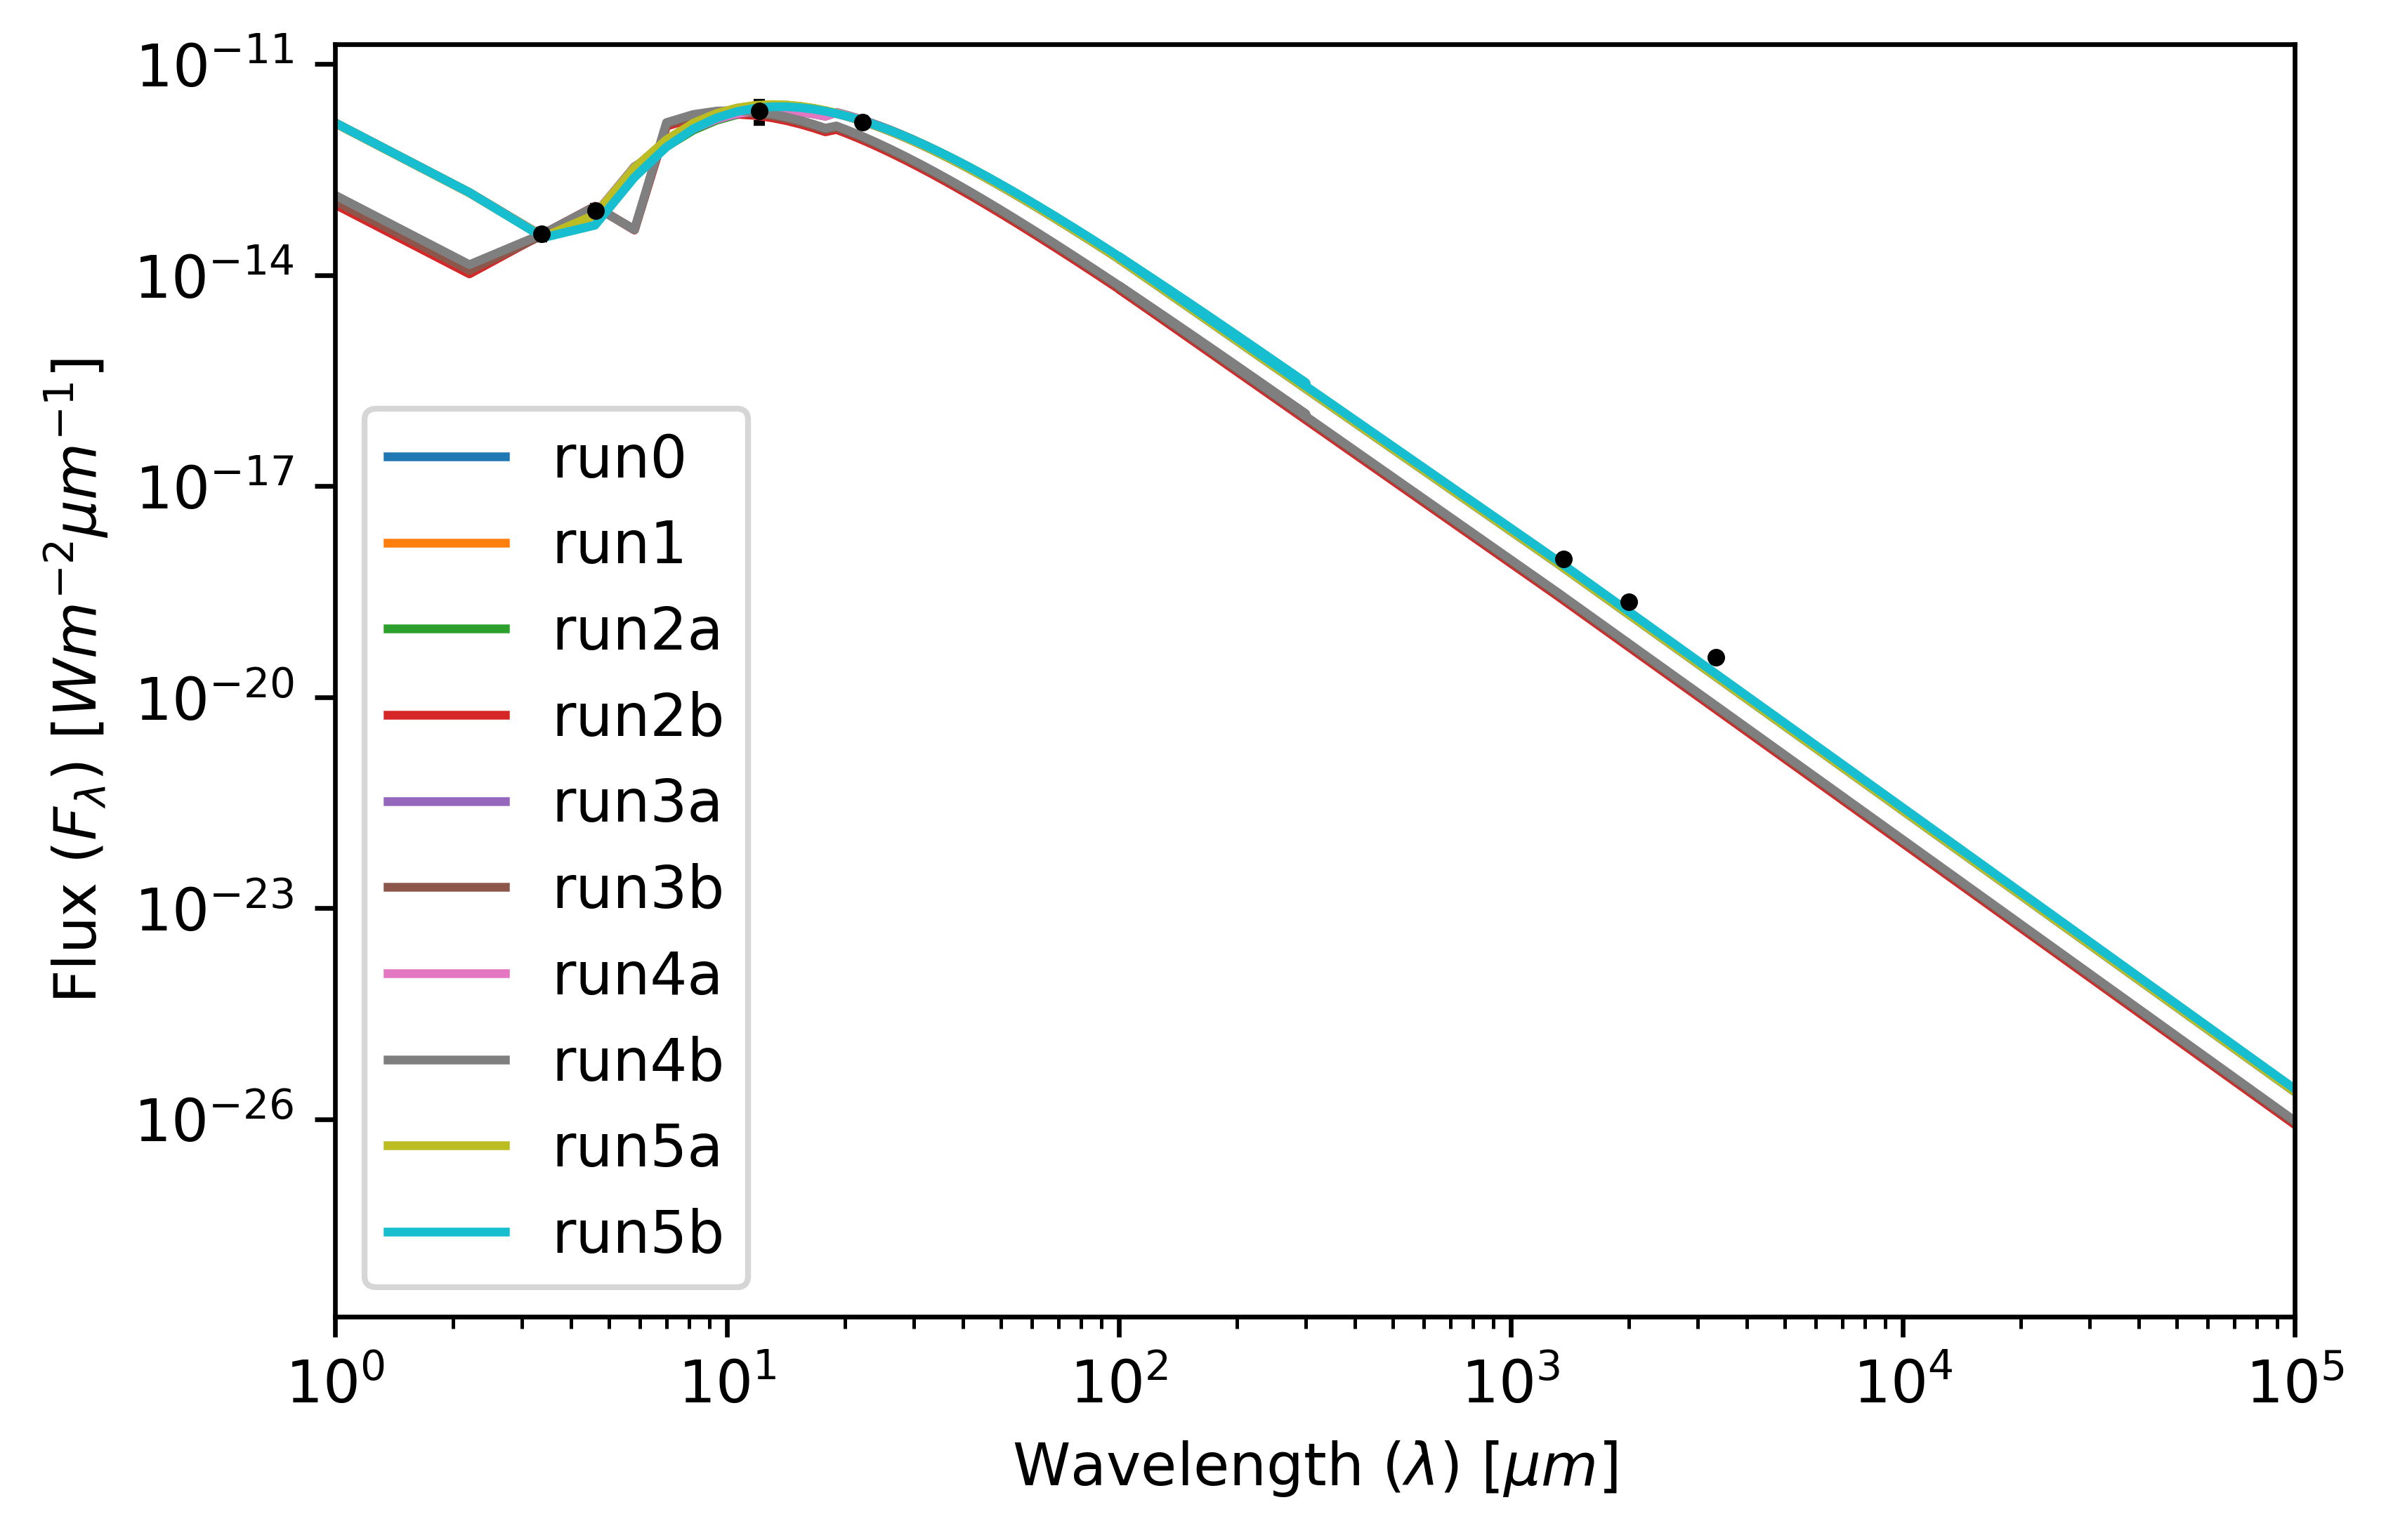

In [7]:
pallas_dict = {'090':{'flux':[139.01588, 131.57227], 'var':[2.0528338, 2.4021997]},
              '150':{'flux':[326.52725, 310.75455, 285.30325], 'var':[5.2094827, 2.691771, 3.0986135]},
              '220':{'flux':[573.7276], 'var':[6.848735]}
             }

pallas = asteroid('2', pallas_dict)
pallas.atm_fit()
pallas.make_SED()
pallas.plt_SEDs()

Calculating number of fits to run...
Fit code: run0
Found existing results database (704/run0/atm_results_run0.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run1
Found existing results database (704/run1/atm_results_run1.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run2a
Found existing results database (704/run2a/atm_results_run2a.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0



/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

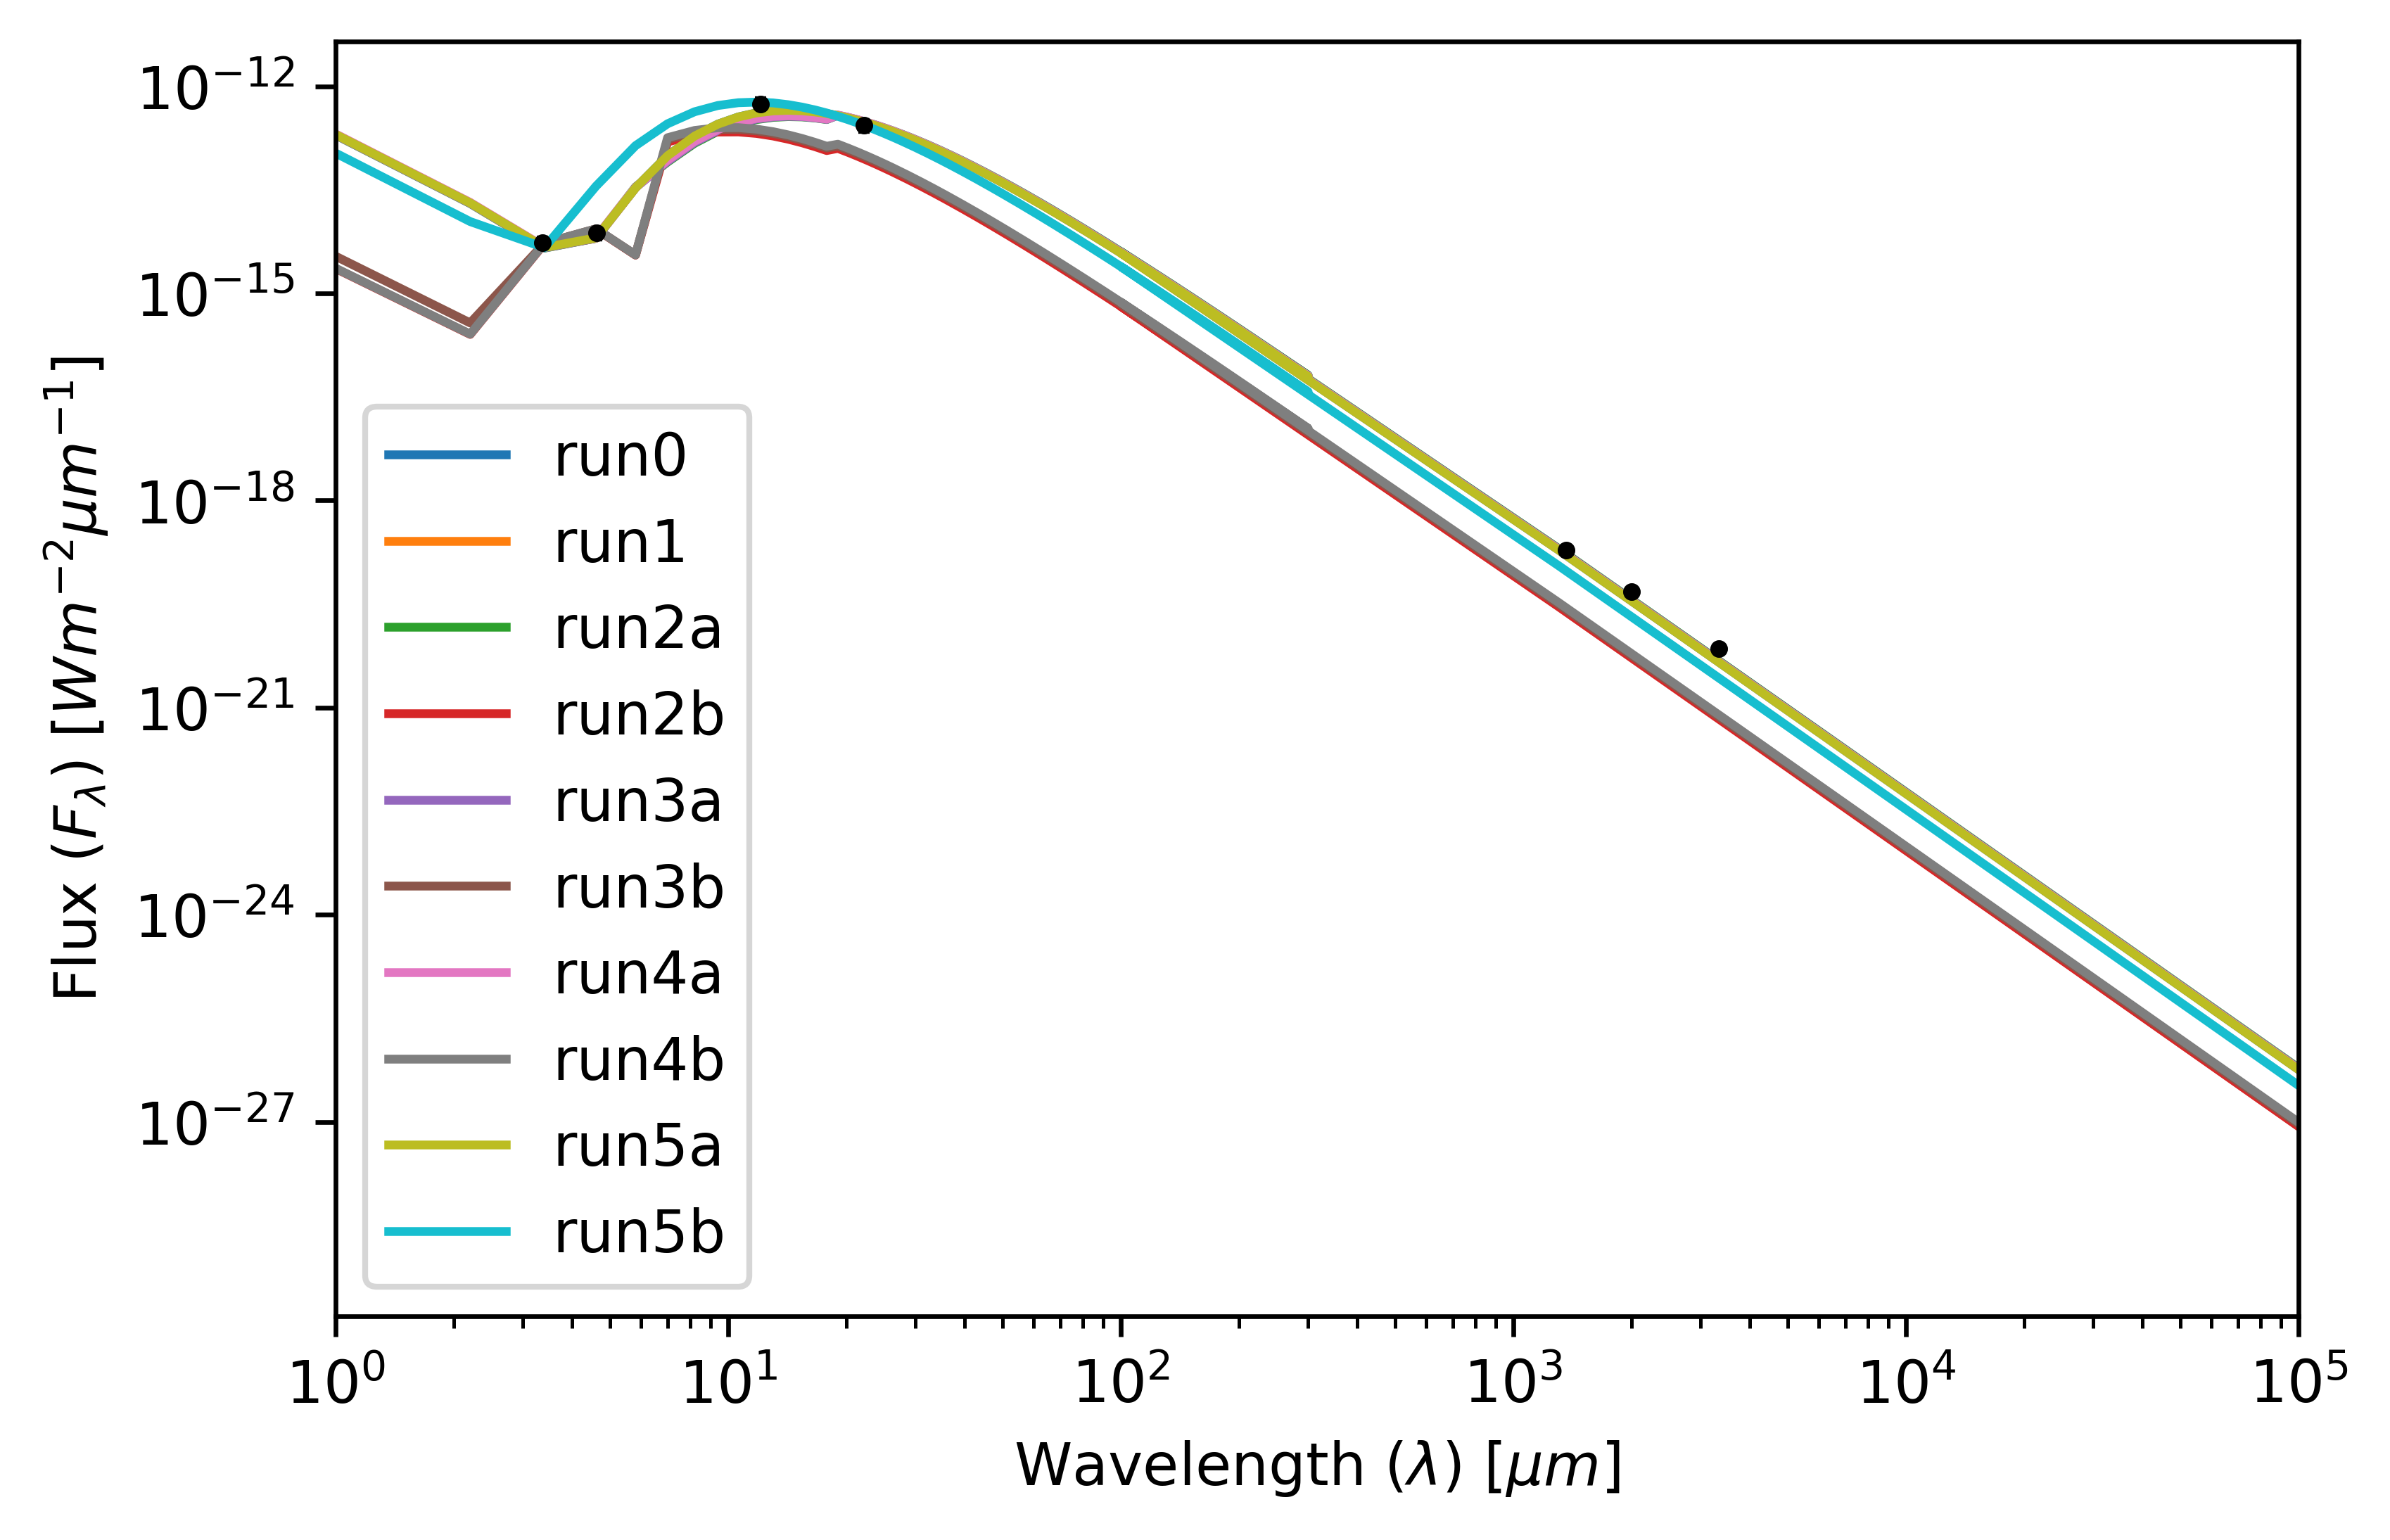

In [8]:
interamnia_dict ={'090':{'flux':[26.955114, 26.414145], 'var':[2.979407, 3.5210254]},
              '150':{'flux':[71.74788, 65.685844, 56.5118], 'var':[5.9909983, 3.8527966, 4.1188393]},
              '220':{'flux':[118.91509], 'var':[8.563795]}
             }

interamnia = asteroid('704', interamnia_dict)
interamnia.atm_fit()
interamnia.make_SED()
interamnia.plt_SEDs()

Calculating number of fits to run...
Fit code: run0
Found existing results database (10/run0/atm_results_run0.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run1
Found existing results database (10/run1/atm_results_run1.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit code: run2a
Found existing results database (10/run2a/atm_results_run2a.db).
Objects previously fitted: 1
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 0

Fit

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

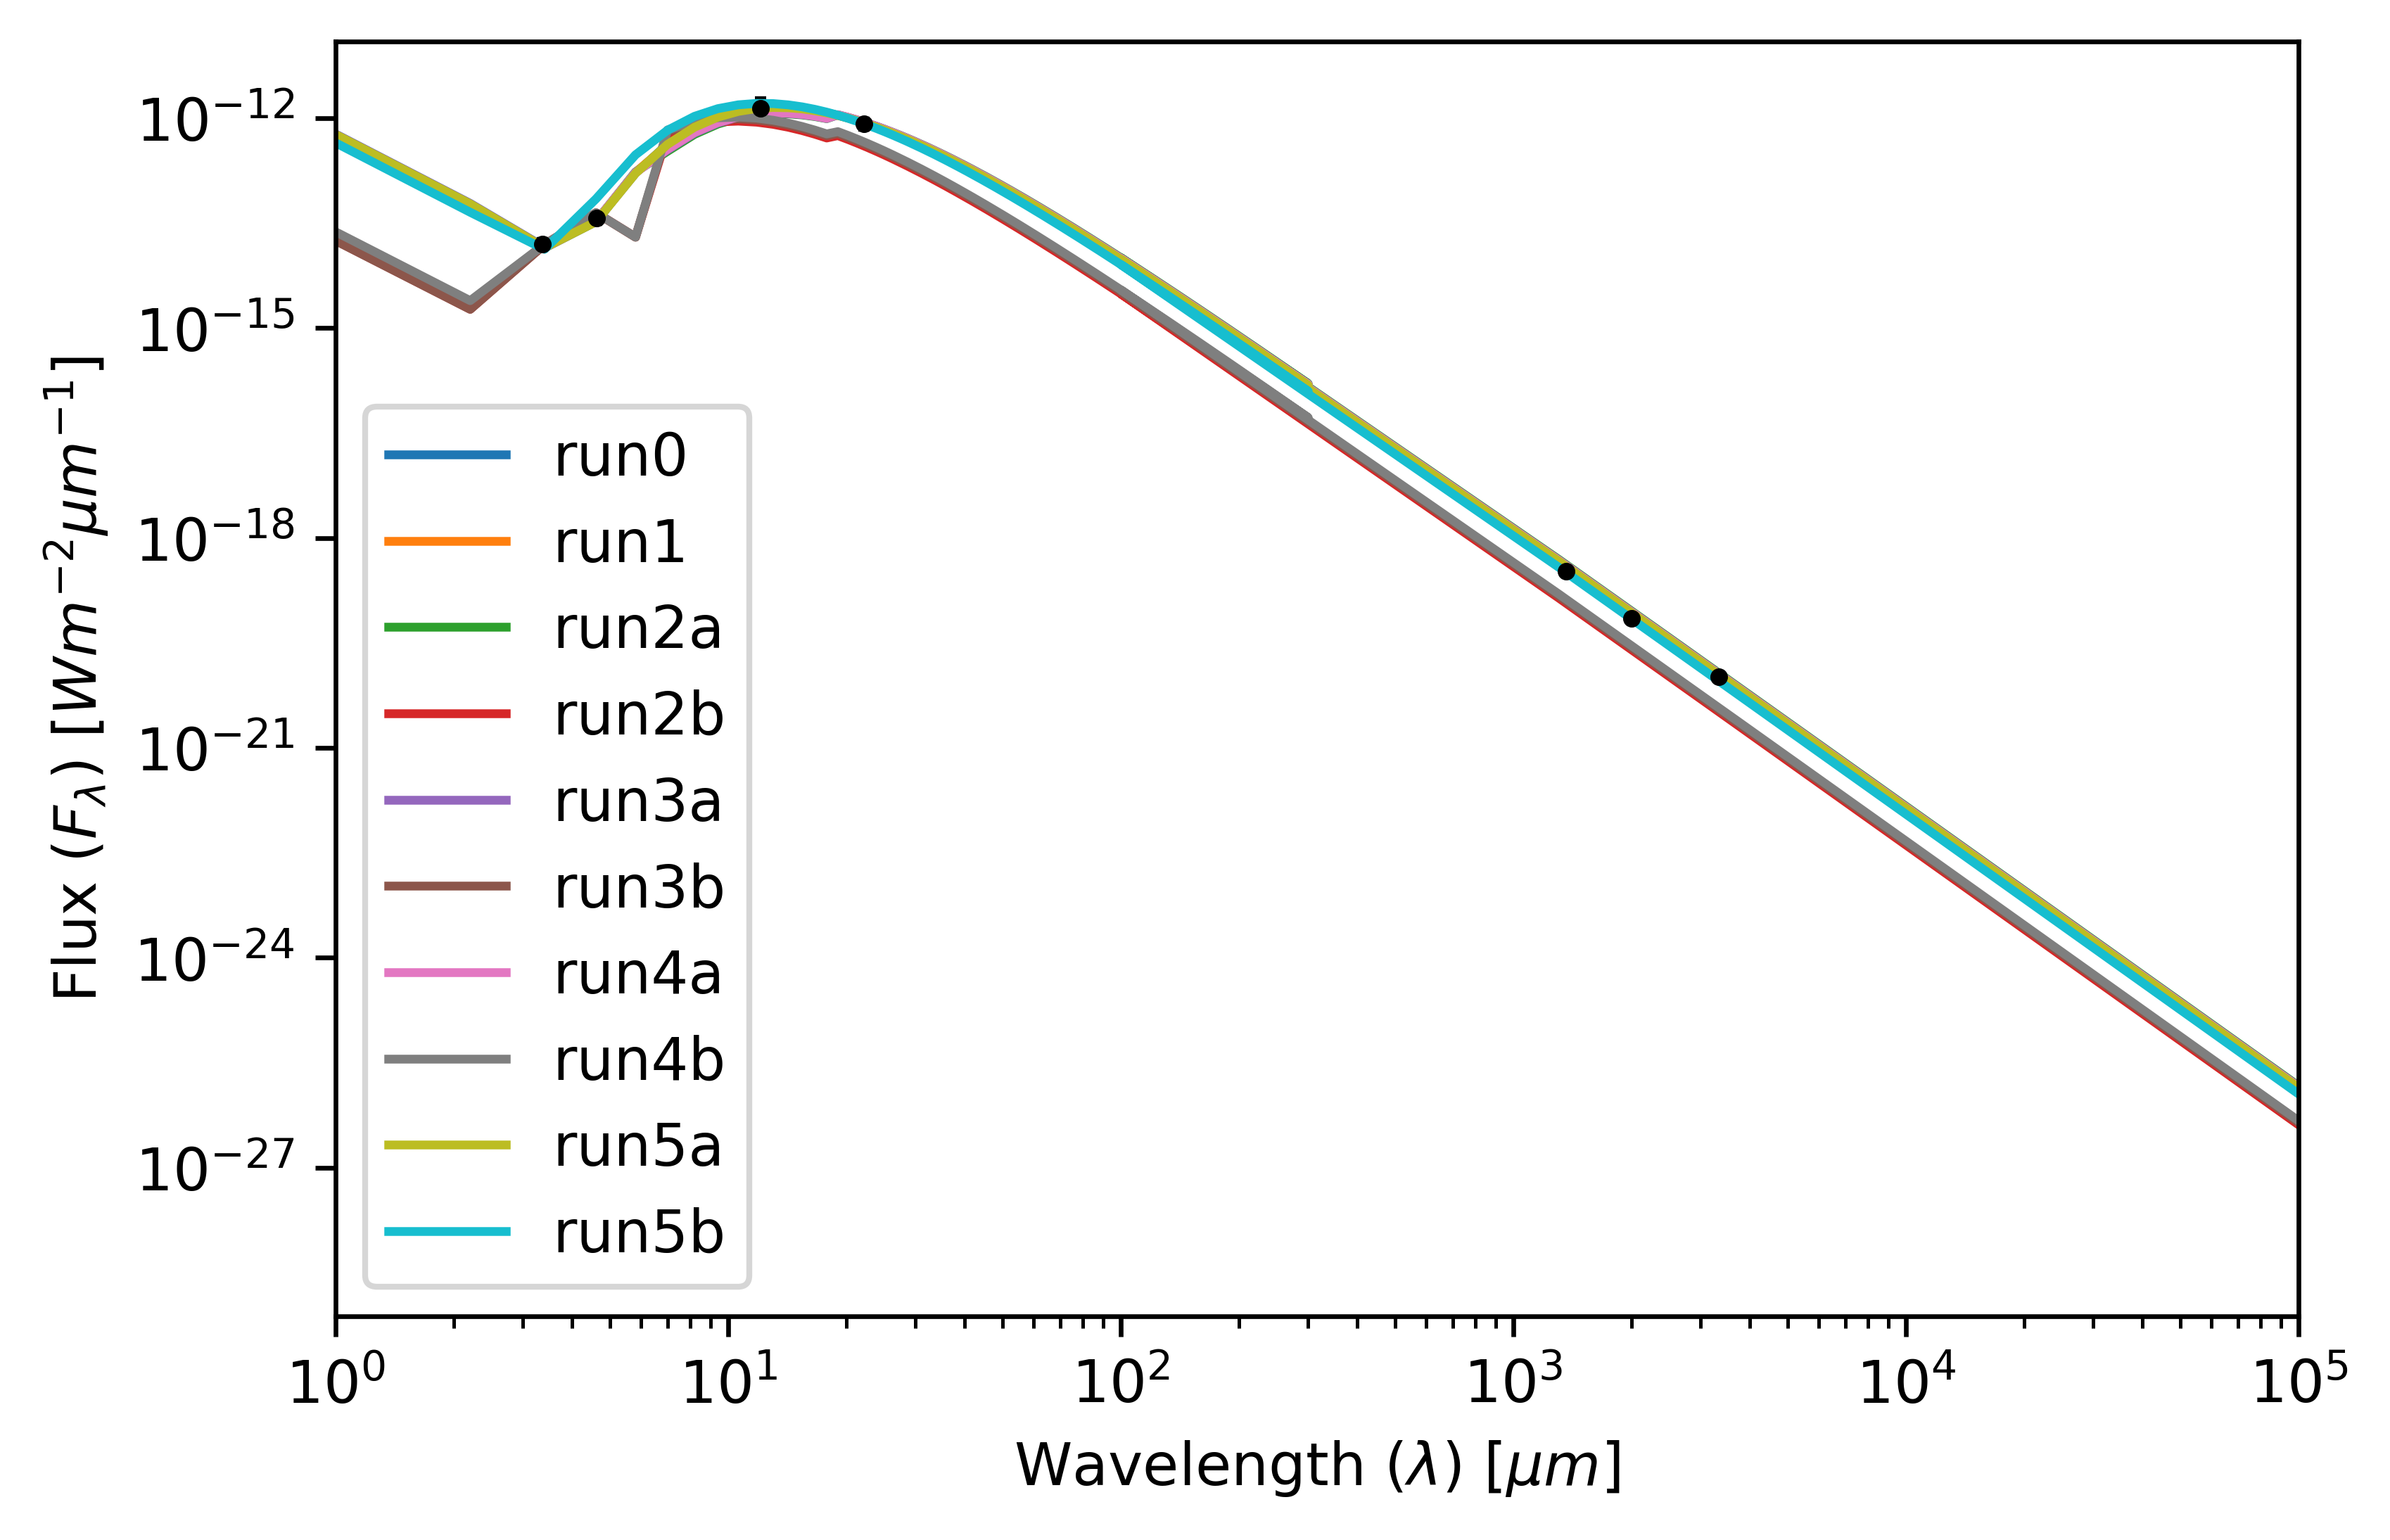

In [9]:
hygiea_dict ={'090':{'flux':[36.922863, 41.581024], 'var':[2.7536077, 3.6568952]},
              '150':{'flux':[93.648224, 100.43267, 84.54032], 'var':[7.0395627, 3.6568952, 4.767336]},
              '220':{'flux':[205.06685], 'var':[8.868363]}
             }

hygiea = asteroid('10', hygiea_dict)
hygiea.atm_fit()
hygiea.make_SED()
hygiea.plt_SEDs()

In [4]:
meta_cards = []

for j in range(1000):
    cards = np.zeros(540)
    play_odds = np.random.random()*17/45 +23/45
    if play_odds >= 1: print('Whoops')
    for i in range(len(cards)):
        temp = 0
        for j in range(46):
            #Check to see if card is in pool
            if np.random.random()>(360/540): continue
            
            #Check to see if card makes deck
            if np.random.random() > play_odds: continue
            
            #Check to see if deck wins
            if np.random.random() > (1/8): continue
                
            temp += 1
        cards[i] = temp
    meta_cards.append(max(cards))
    

In [5]:
np.mean(meta_cards)

8.531

In [6]:
len(np.where((np.array(meta_cards)>=11))[0])

46

In [7]:
np.std(meta_cards)

1.1597581644463644

In [ ]:
# Grab observations and additional data
con = sql.connect("/home/r/rbond/jorlo/dev/atm/atm_data/paper1/sample.db")
#con = sql.connect('/home/r/rbond/jorlo/dev/atm/atm_data/paper1/runs/sigma10/atm_results_run0.db')
observations = pd.read_sql("""SELECT * FROM observations""", con)
additional = pd.read_sql("""SELECT * FROM additional""", con)

# Only keep clipped observations
observations = observations[observations["keep"] == 1]
additional = additional[additional["obs_id"].isin(observations["obs_id"].values)]

# Remove missing H value, G value objects... 
observations = observations[~observations["designation"].isin(['2010 AJ104', '2010 BM69', '2010 DZ64', '2010 EL27', '2010 EW144',
   '2010 FE82', '2010 FJ48', '2010 HK10', '2010 LE80'])]

# Convert phase angle to radians
observations["alpha_rad"] = np.radians(observations["alpha_deg"])
ran_override = False

# Initialize observatory 
obs = WISE()

print(sorted(set(observations["designation"])))

In [ ]:
def _get_desig(id_num):
    home = str(Path.home())
    with open(home+'/dev/minorplanets/asteroids.txt') as f:
        lines = f.readlines()
        name = lines[id_num].replace('\n', '')
        ast = Horizons(id=name)

        ast_name = ast.elements()['targetname'][0]
        desig = ''
        for i in range(len(ast_name)):
            if ast_name[i] == ' ': break
            desig += ast_name[i]
            
    return str(desig), name

def get_desig(id_num):
    home = str(Path.home())
    with open(home+'/dev/minorplanets/asteroids.pk', 'rb') as f:
        df = pk.load(f)
        name = df['name'][id_num]
        desig = df['designation'][id_num]
        semimajor = df['semimajor'][id_num]
    return desig, name, semimajor

class asteroid():
    def __init__(self, asteroid_name, desig, act_flux_dict, atm_dir = '/home/r/rbond/jorlo/dev/atm/',
            save_path = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/', 
            plot_path = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/plots/'):
        self.name = asteroid_name
        self.desig = desig
        self.act_flux_dict = act_flux_dict
        self.path = atm_dir
        self.save_path = save_path
        self.plot_path = plot_path
        
        #Put your atm_data dir here
        con = sql.connect(atm_dir +"atm_data/paper1/sample.db")
        self.observations = pd.read_sql("""SELECT * FROM observations""", con)
        self.additional = pd.read_sql("""SELECT * FROM additional""", con)

        # Only keep clipped observations
        self.observations = self.observations[self.observations["keep"] == 1]
        self.additional = self.additional[self.additional["obs_id"].isin(self.observations["obs_id"].values)]

        # Remove missing H value, G value objects... 
        self.observations = self.observations[~self.observations["designation"].isin(['2010 AJ104', '2010 BM69', '2010 DZ64', '2010 EL27', '2010 EW144',
           '2010 FE82', '2010 FJ48', '2010 HK10', '2010 LE80'])]

        # Convert phase angle to radians
        self.observations["alpha_rad"] = np.radians(self.observations["alpha_deg"])
        self.ran_override = False

        # Initialize observatory 
        self.obs = WISE()

        if self.ran_override == False:
            self.observations = modifyErrors(self.observations, self.obs, sigma=0.15)
            self.ran_override = True
        else:
            print("No need to run this again!")

        self.DPI = 600
        self.SAVE_DIR = "../plots/"
        self.FIG_FORMAT = "png"

        self.SAVE_FIGS = False
        
    def inv_var(self, flux_dict, freq):

        
        num = 0
        denom = 0
        
        for i in range(len(flux_dict[freq]['flux'])):
            num += flux_dict[freq]['flux'][i]/flux_dict[freq]['var'][i]**2
            denom += 1/flux_dict[freq]['var'][i]**2
            
        return num/denom, denom

    def atm_fit(self):        
        runDict = {}
        dataDict = {}

        fitConfig = {
                "chains" : 20,
                "samples" : 3000,
                "burnInSamples": 500,
                "threads": 20,
                "scaling": 0.01,
                "plotTrace" : True,
                "plotCorner" : True,
                "progressBar" : True,
                "figKwargs" : {"dpi" : self.DPI}
            }

        self.data = self.observations[self.observations["designation"].isin([self.desig])]
        if self.data.empty:
            sys.exit('No Wise data for {}'.format(self.name))
            
        self.data_additional = self.additional[self.additional["obs_id"].isin(self.data["obs_id"].values)] # Contains published magnitudes

        dataDict["run0"] = self.data.copy()

        runDict["run0"] = {
            "fitParameters" : ["logT1", "logD", "eps"],
            "emissivitySpecification" : None,
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : None,
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }
        dataDict["run1"] = self.data.copy()
        dataDict["run1"]["eps_W3W4"] = np.ones(len(self.data)) * 0.9

        runDict["run1"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3W4" : ["W3","W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }

        dataDict["run2a"] = self.data.copy()
        dataDict["run2a"]["eps_W3"] = np.ones(len(self.data)) * 0.70
        dataDict["run2a"]["eps_W4"] = np.ones(len(self.data)) * 0.86

        runDict["run2a"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3" : ["W3"],
                        "eps_W4" : ["W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3", "eps_W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }
        dataDict["run2b"] = self.data.copy()
        dataDict["run2b"]["eps_W3"] = np.ones(len(self.data)) * 0.70
        dataDict["run2b"]["eps_W4"] = np.ones(len(self.data)) * 0.86

        runDict["run2b"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
            "emissivitySpecification" : "perBand",
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3", "eps_W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }

        dataDict["run3a"] = self.data.copy()
        dataDict["run3a"]["eps_W3"] = np.ones(len(self.data)) * 0.76
        dataDict["run3a"]["eps_W4"] = np.ones(len(self.data)) * 0.93

        runDict["run3a"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3" : ["W3"],
                        "eps_W4" : ["W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3", "eps_W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }

        dataDict["run3b"] = self.data.copy()
        dataDict["run3b"]["eps_W3"] = np.ones(len(self.data)) * 0.76
        dataDict["run3b"]["eps_W4"] = np.ones(len(self.data)) * 0.93

        runDict["run3b"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
            "emissivitySpecification" : "perBand",
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3", "eps_W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }
        
        dataDict["run4a"] = self.data.copy()
        dataDict["run4a"]["eps_W3"] = np.ones(len(self.data)) * 0.80
        dataDict["run4a"]["eps_W4"] = np.ones(len(self.data)) * 0.98

        runDict["run4a"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3" : ["W3"],
                        "eps_W4" : ["W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3", "eps_W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }
        
        dataDict["run4b"] = self.data.copy()
        dataDict["run4b"]["eps_W3"] = np.ones(len(self.data)) * 0.80
        dataDict["run4b"]["eps_W4"] = np.ones(len(self.data)) * 0.98

        runDict["run4b"] = {
            "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
            "emissivitySpecification" : "perBand",
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : ["eps_W3", "eps_W4"],
                        "p" : None,
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }

        dataDict["run5a"] = self.data.copy()
        dataDict["run5a"]["eps"] = np.ones(len(self.data)) * 0.9
        dataDict["run5a"]["p_W3"] = np.ones(len(self.data)) * 0.0
        dataDict["run5a"]["p_W4"] = np.ones(len(self.data)) * 0.0

        runDict["run5a"] = {
            "fitParameters" : ["logT1", "logD", "p_W1W2"],
            "emissivitySpecification" : None,
            "albedoSpecification": {
                        "p_W1W2" : ["W1", "W2"],
                        "p_W3" : ["W3"],
                        "p_W4" : ["W4"]},
            "fitFilters" : "all",
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : "eps",
                        "p" : ["p_W3", "p_W4"],
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }

        dataDict["run5b"] = self.data.copy()
        dataDict["run5b"]["eps"] = np.ones(len(self.data)) * 0.9
        dataDict["run5b"]["p_W3"] = np.ones(len(self.data)) * 0.0
        dataDict["run5b"]["p_W4"] = np.ones(len(self.data)) * 0.0

        runDict["run5b"] = {
            "fitParameters" : ["logT1", "logD", "p_W1W2"],
            "emissivitySpecification" : None,
            "albedoSpecification": {
                        "p_W1W2" : ["W1", "W2"],
                        "p_W3" : ["W3"],
                        "p_W4" : ["W4"]},
            "fitFilters" : ["W1", "W3", "W4"],
            "columnMapping" : {
                        "obs_id" : "obs_id",
                        "designation" : "designation",
                        "exp_mjd" : "mjd",
                        "r_au" : "r_au",
                        "delta_au" : "delta_au",
                        "alpha_rad" : "alpha_rad",
                        "eps" : "eps",
                        "p" : ["p_W3", "p_W4"],
                        "G" : "G",
                        "logT1" : None,
                        "logD" : None,
                        "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                        "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                        "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                        "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
            }
        }

        obs = self.obs
        self.model = NEATM(verbose=False, tableDir=self.path+'atm/models/tables/neatm/')

        self.summary, self.model_observations = multiFit(self.model, self.obs, dataDict, runDict, fitConfig, 
                                               saveDir=self.save_path + self.name)
        self.dataDict = dataDict
        self.runDict = runDict



    def post_process(self):
        observations_pp, model_observations_pp, observed_stats, model_stats = postProcess(obs, 
                                                                                      data,
                                                                                      model_observations, 
                                                                                      summary)

    def make_SED(self):
        lambdaRange=[1.0e-6, 30e-5]
        lambdaNum=250
        lambdaEdges=[3.9e-6, 6.5e-6, 18.5e-6]

        SEDs = {}
        for code in self.runDict.keys():
            SEDs[code] = calcFluxLambdaSED(self.model, self.obs, self.dataDict[code], 
                                           summary=self.summary[self.summary["code"] == code], 
                                           fitParameters=self.runDict[code]["fitParameters"],
                                           emissivitySpecification=self.runDict[code]["emissivitySpecification"],
                                           albedoSpecification=self.runDict[code]["albedoSpecification"],
                                           columnMapping=self.runDict[code]["columnMapping"],
                                           lambdaRange=lambdaRange,
                                           lambdaNum=lambdaNum,
                                           lambdaEdges=lambdaEdges,
                                           linearInterpolation=False)

        lambdaRange=[1.0e-4, 30e-2]
        lambdaNum=250
        lambdaEdges=[3.9e-6, 6.5e-6, 18.5e-6]

        SEDs_ACT = {}
        for code in self.runDict.keys():
            SEDs_ACT[code] = calcFluxLambdaSED(self.model, self.obs, self.dataDict[code], 
                                           summary=self.summary[self.summary["code"] == code], 
                                           fitParameters=self.runDict[code]["fitParameters"],
                                           emissivitySpecification=self.runDict[code]["emissivitySpecification"],
                                           albedoSpecification=self.runDict[code]["albedoSpecification"],
                                           columnMapping=self.runDict[code]["columnMapping"],
                                           lambdaRange=lambdaRange,
                                           lambdaNum=lambdaNum,
                                           lambdaEdges=lambdaEdges,
                                           linearInterpolation=False)
        self.WISE_SEDs = SEDs
        self.ACT_SEDs = SEDs_ACT
        
        for code in SEDs.keys():
            SEDs[code] = SEDs[code].append(SEDs_ACT[code])
            
        self.FULL_SEDs = SEDs
    
    def plt_SEDs(self):
        fig, ax = plt.subplots(1, 1, dpi=self.DPI)
        plotObservations(self.obs, self.data, ax=ax, plotMedian=True)
        for code in self.dataDict.keys():
            plotSED(self.FULL_SEDs[code], ax=ax, plotKwargs={"label": code})
        print(self.act_flux_dict)
        flux_pa4_150, err_pa4_150 = self.act_flux_dict['pa4']['150']['flux'], self.act_flux_dict['pa4']['150']['var']
        flux_pa4_220, err_pa4_220 = self.act_flux_dict['pa4']['220']['flux'], self.act_flux_dict['pa4']['220']['var']
        
        flux_pa5_090, err_pa5_090 = self.act_flux_dict['pa5']['090']['flux'], self.act_flux_dict['pa5']['090']['var']
        flux_pa5_150, err_pa5_150 = self.act_flux_dict['pa5']['150']['flux'], self.act_flux_dict['pa5']['150']['var']
        
        flux_pa6_090, err_pa6_090 = self.act_flux_dict['pa6']['090']['flux'], self.act_flux_dict['pa6']['090']['var']
        flux_pa6_150, err_pa6_150 = self.act_flux_dict['pa6']['150']['flux'], self.act_flux_dict['pa6']['150']['var']
        
        act_fluxes = [flux_pa5_090, flux_pa6_090, flux_pa4_150, flux_pa5_150, flux_pa6_150, flux_pa4_220]*u.mJy
        act_errs = [err_pa5_090, err_pa6_090, err_pa4_150, err_pa5_150, err_pa6_150, err_pa4_220]*u.mJy
        act_freqs = np.array([0.00333103, 0.00333103, 0.00199862, 0.00199862, 0.00199862, 0.00136269,])*u.m

        act_flux_units = np.zeros(len(act_fluxes))
        act_errs_units = np.zeros(len(act_fluxes))
        for i in range(len(act_fluxes)):
            act_flux_units[i] = ((2.99792458e+14 * act_fluxes[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)
            act_errs_units[i] = ((2.99792458e+14 * act_errs[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)

        ax.errorbar(act_freqs.to(u.um).value, 
                                act_flux_units, 
                                act_errs_units, 
                                fmt='o',
                                c="k",
                                ms=2,
                                capsize=1,
                                elinewidth=1)
        ax.legend()
        ax.set_xlim(1, 1e5)
        plt.savefig('{}_plot.pdf'.format(self.name))
        plt.show()
        
        self.act_fluxes = act_fluxes
        self.act_flux_units = act_flux_units


# Reference fluxes for Ricco

In [ ]:
normalize = True
if normalize:
    fpath = '/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk'
    if os.path.exists(fpath):
        with open(fpath, 'rb') as f:
            theory_flux_dict = pk.load(f)
    else:
        theory_flux_dict = {}
else:
    with open('/home/r/rbond/jorlo/dev/minorplanets/theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)

for i in range(1200):
    id_num = i
    try:
        id_num = i

        desig, name, semimajor = get_desig(id_num)
        print(name)
        if name in theory_flux_dict.keys(): continue
        flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'

        with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
            vesta_dict = pk.load(f)

        ast = asteroid(name, desig, vesta_dict, semimajor = semimajor, show_plot= True,  obs=WISE()) 
        ast.add_run('run0')

        #Run 1
        dataDict = ast.data.copy()
        dataDict["eps_W3W4"] = np.ones(len(ast.data)) * 0.9

        run1 = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3W4" : ["W3","W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" :ast.columnMapping
        }

        ast.add_run('run1', eps = ['eps_W3W4'], runData = dataDict, runConfig = run1)

        #Run 2a
        dataDict = ast.data.copy()
        dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.70
        dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.86

        run2a = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3" : ["W3"],
                        "eps_W4" : ["W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run2a', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run2a)

        #Run 2b
        dataDict = ast.data.copy()
        dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.70
        dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.86

        run2b = {
            "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
            "emissivitySpecification" : "perBand",
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run2b', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run2b)

        #Run 3a
        dataDict = ast.data.copy()
        dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.76
        dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.93

        run3a = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3" : ["W3"],
                        "eps_W4" : ["W4"]},
           "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run3a', eps = ["eps_W3", "eps_W4"], runData = dataDict, runConfig = run3a)

        #Run 3b
        dataDict = ast.data.copy()
        dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.76
        dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.93

        run3b = {
            "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
            "emissivitySpecification" : "perBand",
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run3b', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run3b)

        #Run 4a

        dataDict = ast.data.copy()
        dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.80
        dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.98

        run4a = {
            "fitParameters" : ["logT1", "logD", "eps_W1W2"],
            "emissivitySpecification" : {
                        "eps_W1W2" : ["W1","W2"],
                        "eps_W3" : ["W3"],
                        "eps_W4" : ["W4"]},
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run4a', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run4a)

        #Run 4b

        dataDict = ast.data.copy()
        dataDict["eps_W3"] = np.ones(len(ast.data)) * 0.80
        dataDict["eps_W4"] = np.ones(len(ast.data)) * 0.98

        run4b = {
            "fitParameters" : ["logT1", "logD", "eps_W1", "eps_W2"],
            "emissivitySpecification" : "perBand",
            "albedoSpecification": "auto",
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run4b', eps = ['eps_W3', 'eps_W4'], runData = dataDict, runConfig = run4b)

        #Run 5a

        dataDict = ast.data.copy()
        dataDict["eps"] = np.ones(len(ast.data)) * 0.9
        dataDict["p_W3"] = np.ones(len(ast.data)) * 0.0
        dataDict["p_W4"] = np.ones(len(ast.data)) * 0.0

        run5a = {
            "fitParameters" : ["logT1", "logD", "p_W1W2"],
            "emissivitySpecification" : None,
            "albedoSpecification": {
                        "p_W1W2" : ["W1", "W2"],
                        "p_W3" : ["W3"],
                        "p_W4" : ["W4"]},
            "fitFilters" : "all",
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run5a', p = ['p_W3', 'p_W4'], eps = 'eps', runData = dataDict, runConfig = run5a)

        #Run 5b

        dataDict = ast.data.copy()
        dataDict["eps"] = np.ones(len(ast.data)) * 0.9
        dataDict["p_W3"] = np.ones(len(ast.data)) * 0.0
        dataDict["p_W4"] = np.ones(len(ast.data)) * 0.0

        run5b = {
            "fitParameters" : ["logT1", "logD", "p_W1W2"],
            "emissivitySpecification" : None,
            "albedoSpecification": {
                        "p_W1W2" : ["W1", "W2"],
                        "p_W3" : ["W3"],
                        "p_W4" : ["W4"]},
            "fitFilters" : ["W1", "W3", "W4"],
            "columnMapping" : ast.columnMapping
        }

        ast.add_run('run5b', p = ['p_W3', 'p_W4'], eps = 'eps', runData = dataDict, runConfig = run5b)

        ast.atm_fit()
        ast.load_SEDs()
        #ast.plt_SEDs(spectral = 'bbody')
        
    except: continue

    cur_flux_dict = {}

    for code in ast.dataDict.keys():
        try:
            fluxes = ast.eval_SED(np.mean(ast.data['r_au'].to_numpy()), np.mean(ast.data['delta_au'].to_numpy()), [0.00333103, 0.00199862, 0.00136269], code, normalize = normalize)
            #print(fluxes)
            cur_flux_dict[code] = fluxes
        except:
            print('asteroid {} failed'.format(name))
    theory_flux_dict[name] = cur_flux_dict

    if i % 25:
        with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'wb') as f:
            print('dumping')
            pk.dump(theory_flux_dict, f)
    

Vesta
Calculating number of fits to run...
Fit code: run0
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run0/atm_results_run0.db).
Objects previously fitted: 0
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 1

Fit code: run1
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run1/atm_results_run1.db).
Objects previously fitted: 0
Removing incomplete fits (sampling may have been interrupted).
Removing incomplete fits (if any) from summary table...
Removing incomplete fits (if any) from model_observations table...
Number of fits to run: 1

Fit code: run2a
Found existing results database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run2a/atm_results_run2a.db).
Objects previously fitted: 1
Removing incomple

Sequential sampling (20 chains in 1 job)
CompoundStep
>Metropolis: [eps]
>Metropolis: [logT1]
>Metropolis: [logD]
Sampling chain 19, 0 divergences: 100%|██████████| 3500/3500 [00:20<00:00, 172.83it/s]
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Found best fit parameters:
 logT1: 2.608 +- 0.011
 logD:  5.710 +- 0.027
 eps:   0.762 +- 0.029
Total time: 570.14 seconds
Done.

Completed. Traces have the desired number of samples.
Saving results to database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run0/atm_results_run0.db)...
Done.

Starting fit code: run1

Fitting object 4 (1/1)...
Fit number: 2/9

Fitting 4 with NEATM...
Fit Code: run1
Fit Parameters: ['logT1', 'logD', 'eps_W1W2']
Emissivity Parameters: ['eps_W1W2' 'eps_W3W4']
Emissivity Specification: {'eps_W1W2': ['W1', 'W2'], 'eps_W3W4': ['W3', 'W4']}
Albedo Parameters: ['p_W1W2' 'p_W3W4']
Albedo Specification: auto
Number of observations: 5
Chains: 20
Samples per Chain: 3500
Burn-in Samples: 500
Effective Samples per Chain: 3000
Threads: 1
eps names:  [[eps_W1W2], [eps_W1W2], [eps_W3W4], [eps_W3W4]]
eps  __str__ = [[0.5]
 [0.5]
 [0.9]
 [0.9]]


Sequential sampling (20 chains in 1 job)
INFO:pymc3:Sequential sampling (20 chains in 1 job)
CompoundStep
INFO:pymc3:CompoundStep
>Metropolis: [eps_W1W2]
INFO:pymc3:>Metropolis: [eps_W1W2]
>Metropolis: [logT1]
INFO:pymc3:>Metropolis: [logT1]
>Metropolis: [logD]
INFO:pymc3:>Metropolis: [logD]
Sampling chain 3, 0 divergences:  68%|██████▊   | 2393/3500 [00:15<00:07, 158.11it/s]
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful

Found best fit parameters:
 logT1:    2.632 +- 0.058
 logD:     5.627 +- 0.133
 eps_W1W2: 0.646 +- 0.347
Total time: 109.55 seconds
Done.

Completed. Traces have the desired number of samples.
Saving results to database (/scratch/r/rbond/jorlo/actxminorplanets/sigurd/atm_fits/Vesta_WISE/run1/atm_results_run1.db)...
Done.

Starting fit code: run2a

Starting fit code: run2b

Fitting object 4 (1/1)...
Fit number: 3/9

Fitting 4 with NEATM...
Fit Code: run2b
Fit Parameters: ['logT1', 'logD', 'eps_W1', 'eps_W2']
Emissivity Parameters: ['eps_W1' 'eps_W2' 'eps_W3' 'eps_W4']
Emissivity Specification: perBand
Albedo Parameters: ['p_W1' 'p_W2' 'p_W3' 'p_W4']
Albedo Specification: auto
Number of observations: 5
Chains: 20
Samples per Chain: 3500
Burn-in Samples: 500
Effective Samples per Chain: 3000
Threads: 1
eps names:  [[eps_W1], [eps_W2], [eps_W3], [eps_W4]]
eps  __str__ = [[0.5 ]
 [0.5 ]
 [0.7 ]
 [0.86]]


Sequential sampling (20 chains in 1 job)
INFO:pymc3:Sequential sampling (20 chains in 1 job)
CompoundStep
INFO:pymc3:CompoundStep
>Metropolis: [eps_W2]
INFO:pymc3:>Metropolis: [eps_W2]
>Metropolis: [eps_W1]
INFO:pymc3:>Metropolis: [eps_W1]
>Metropolis: [logT1]
INFO:pymc3:>Metropolis: [logT1]
>Metropolis: [logD]
INFO:pymc3:>Metropolis: [logD]
Sampling chain 17, 0 divergences:   6%|▌         | 193/3500 [00:01<00:30, 107.35it/s]


Ceres
Pallas
Juno
Iris


In [6]:
with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'wb') as f:
    print('dumping')
    pk.dump(theory_flux_dict, f)

dumping


In [7]:
with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'rb') as f:
    load_theory_flux_dict = pk.load(f)
    print(len(load_theory_flux_dict.keys()))

907


In [3]:
len(theory_flux_dict.keys())

NameError: name 'theory_flux_dict' is not defined

In [7]:
with open('/home/r/rbond/jorlo/dev/minorplanets/theory_flux_dict.pk', 'wb') as f:
    print('dumping')
    pk.dump(theory_flux_dict, f)

dumping


In [2]:
with open('/scratch/r/rbond/jorlo/actxminorplanets/sigurd/normalized_theory_flux_dict.pk', 'rb') as f:
    load_theory_flux_dict = pk.load(f)

In [3]:
len(load_theory_flux_dict.keys())

3

In [13]:
with open('/home/r/rbond/jorlo/dev/minorplanets/theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)

# AtLAST Plot

In [41]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import warnings
from astropy import units as u


%matplotlib inline

%load_ext autoreload
%autoreload 2

from atm import modifyErrors
from atm import multiFit
from atm.models import NEATM
from atm.obs import WISE
from atm.analysis import calcMagChi2
from atm.analysis import calcMagReducedChi2
from atm.analysis import postProcess
from atm.functions import calcFluxLambdaSED
from atm.plotting import plotObservations
from atm.plotting import plotSED

from asteroid_utils_atm import asteroid, get_desig

import pickle as pk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
m_to_mum = 1e6 # simple conversion from m to micron
km_to_m = 1e3 # conversion km to m

DPI = 600
SAVE_DIR = "../plots/"
FORMAT = "pdf"

SAVE_FIGS = False

In [24]:
# Grab observations and additional data
con = sql.connect("/home/r/rbond/jorlo/dev/atm/atm_data/paper1/sample.db")
#con = sql.connect('/home/r/rbond/jorlo/dev/atm/atm_data/paper1/runs/sigma10/atm_results_run0.db')
observations = pd.read_sql("""SELECT * FROM observations""", con)
additional = pd.read_sql("""SELECT * FROM additional""", con)

# Only keep clipped observations
observations = observations[observations["keep"] == 1]
additional = additional[additional["obs_id"].isin(observations["obs_id"].values)]

# Remove missing H value, G value objects... 
observations = observations[~observations["designation"].isin(['2010 AJ104', '2010 BM69', '2010 DZ64', '2010 EL27', '2010 EW144',
   '2010 FE82', '2010 FJ48', '2010 HK10', '2010 LE80'])]

# Convert phase angle to radians
observations["alpha_rad"] = np.radians(observations["alpha_deg"])
ran_override = False

# Initialize observatory 
obs = WISE()

In [25]:
if ran_override == False:
    observations = modifyErrors(observations, obs, sigma=0.15)
    ran_override = True
else:
    print("No need to run this again!")

In [29]:
np.array(set(observations["designation"]))

array({'24980', '2815', '15920', '1353', '17508', '199', '104922', '3461', '288567', '35099', '5962', '8373', '17154', '5199', '849', '10629', '3187', '287559', '2010 GX154', '357', '20843', '1191', '383', '12167', '13809', '18896', '301536', '38871', '85839', '21555', '177830', '3912', '28736', '217919', '5889', '18393', '152941', '5970', '11220', '38078', '813', '1638', '11494', '10753', '16405', '2160', '2773', '349068', '210594', '31208', '2272', '4933', '236', '7805', '3114', '13010', '2010 MA113', '98099', '7864', '217', '45991', '4905', '126941', '26612', '54355', '3791', '18560', '8857', '30453', '57545', '18654', '173246', '20767', '624', '2025', '6833', '14190', '4443', '10514', '3509', '36789', '38912', '51327', '4809', '53097', '16571', '301583', '33815', '4644', '2422', '19501', '138', '9853', '30220', '1397', '3134', '4691', '103672', '35369', '3531', '934', '6394', '491', '777', '30693', '5546', '10639', '24737', '26985', '897', '1787', '376944', '1698', '134138', '8782'

In [30]:
asteroid_name = "60606"
runDict = {}
dataDict = {}

fitConfig = {
        "chains" : 20,
        "samples" : 3000,
        "burnInSamples": 500,
        "threads": 20,
        "scaling": 0.01,
        "plotTrace" : True,
        "plotCorner" : True,
        "progressBar" : True,
        "figKwargs" : {"dpi" : 300}
    }

data = observations[observations["designation"].isin([asteroid_name])]
data_additional = additional[additional["obs_id"].isin(data["obs_id"].values)] # Contains published magnitudes

In [31]:
data

,obs_id,designation,r_au,delta_au,alpha_deg,H_mag,G,mjd,flux_W1_si,fluxErr_W1_si,...,mag_W1,magErr_W1,mag_W2,magErr_W2,mag_W3,magErr_W3,mag_W4,magErr_W4,keep,alpha_rad
70508,70509,60606,2.729491,2.532686,21.5473,14.5,0.15,55298.032804,2.069974e-10,3.927423e-11,...,13.982,0.206,14.406,0.349,10.003,0.308,7.056,0.422,1,0.376071
70509,70510,60606,2.729299,2.524550,21.5509,14.5,0.15,55298.628236,1.445323e-10,2.928621e-11,...,14.372,0.220,14.311,0.422,9.124,0.224,6.583,0.322,1,0.376134
70510,70511,60606,2.729277,2.523646,21.5513,14.5,0.15,55298.694452,3.457521e-10,6.082385e-11,...,13.425,0.191,13.534,0.253,9.843,0.289,6.393,0.293,1,0.376141


In [32]:
dataDict["IR"] = data.copy()
dataDict["IR"]["eps"] = np.ones(len(data)) * 0.9
dataDict["IR"]["p_W3"] = np.ones(len(data)) * 0.0
dataDict["IR"]["p_W4"] = np.ones(len(data)) * 0.0

runDict["IR"] = {
    "fitParameters" : ["logT1", "logD", "p_W1W2"],
    "emissivitySpecification" : None,
    "albedoSpecification": {
                "p_W1W2" : ["W1", "W2"],
                "p_W3" : ["W3"],
                "p_W4" : ["W4"]},
    "fitFilters" : "all",
    "columnMapping" : {
                "obs_id" : "obs_id",
                "designation" : "designation",
                "exp_mjd" : "mjd",
                "r_au" : "r_au",
                "delta_au" : "delta_au",
                "alpha_rad" : "alpha_rad",
                "eps" : "eps",
                "p" : ["p_W3", "p_W4"],
                "G" : "G",
                "logT1" : None,
                "logD" : None,
                "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
    }
}

60606
Calculating number of fits to run...
Fit code: IR
Number of fits to run: 1

Total number of fits to run: 1

Starting fit code: IR

Fitting object 60606 (1/1)...
Fit number: 1/1



/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

Fitting 60606 with NEATM...
Fit Code: IR
Fit Parameters: ['logT1', 'logD', 'p_W1W2']
Emissivity Parameters: ['eps']
Emissivity Specification: None
Albedo Parameters: ['p_W1W2' 'p_W3' 'p_W4']
Albedo Specification: {'p_W1W2': ['W1', 'W2'], 'p_W3': ['W3'], 'p_W4': ['W4']}
Number of observations: 3
Chains: 20
Samples per Chain: 3500
Burn-in Samples: 500
Effective Samples per Chain: 3000
Threads: 20
eps  __str__ = 0.9


Multiprocess sampling (20 chains in 20 jobs)
CompoundStep
>Metropolis: [p_W1W2]
>Metropolis: [logT1]
>Metropolis: [logD]
Sampling 20 chains, 0 divergences: 100%|██████████| 70000/70000 [00:42<00:00, 1636.71draws/s]
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Found best fit parameters:
 logT1:  2.478 +- 0.042
 logD:   3.842 +- 0.119
 p_W1W2: 2.332 +- 1.319


/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

Total time: 176.41 seconds
Done.

Completed. Traces have the desired number of samples.
Done.

[  designation  model code parameter  median  sigmaG   mean     sd  hdi_3%  \
0       60606  NEATM   IR     logT1   2.478   0.042  2.475  0.039   2.404   
1       60606  NEATM   IR      logD   3.842   0.119  3.850  0.109   3.664   
2       60606  NEATM   IR    p_W1W2   2.332   1.319  2.518  1.149   0.954   

   hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  ess_bulk  ess_tail  r_hat  
0    2.543      0.004    0.003     102.0   102.0     104.0     223.0   1.16  
1    4.039      0.011    0.008      98.0    97.0      99.0     220.0   1.17  
2    4.963      0.112    0.079     106.0   106.0      97.0     196.0   1.17  ]


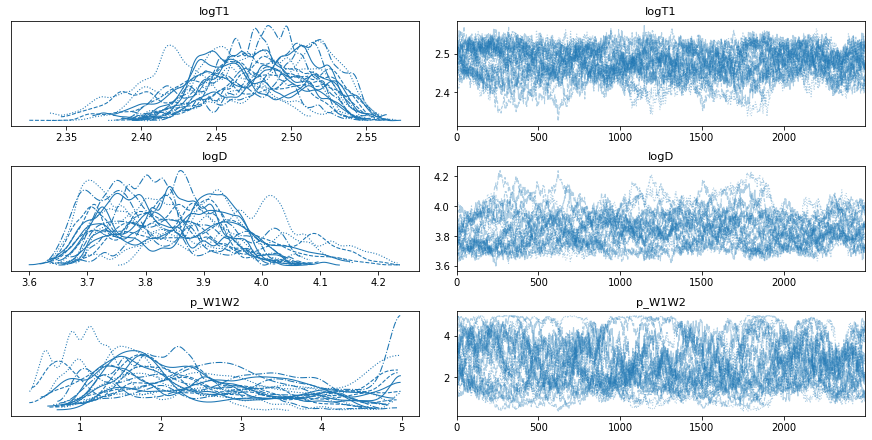

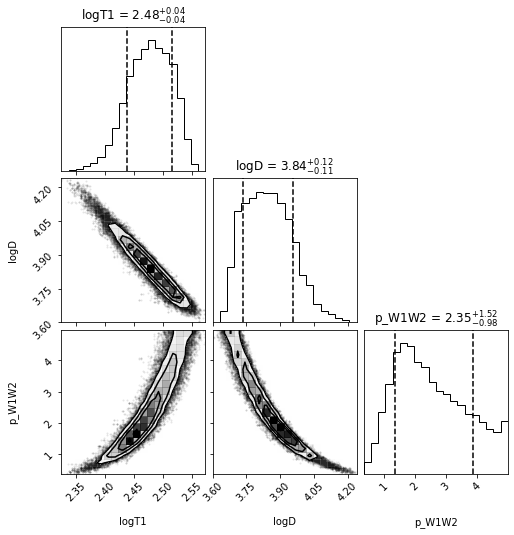

In [33]:
obs = WISE()
print(asteroid_name)
model = NEATM(verbose=False, tableDir='/home/r/rbond/jorlo/dev/atm/atm/models/tables/neatm/')

summary, model_observations = multiFit(model, obs, dataDict, runDict, fitConfig)

In [34]:
lambdaRange=[1.0e-6, 10e-5]
lambdaNum=2500
lambdaEdges=[3.9e-6, 6.5e-6, 18.5e-6]

SEDs = {}
for code in runDict.keys():
    SEDs[code] = calcFluxLambdaSED(model, obs, dataDict[code], 
                                   summary=summary[summary["code"] == code], 
                                   fitParameters=runDict[code]["fitParameters"],
                                   emissivitySpecification=runDict[code]["emissivitySpecification"],
                                   albedoSpecification=runDict[code]["albedoSpecification"],
                                   columnMapping=runDict[code]["columnMapping"],
                                   lambdaRange=lambdaRange,
                                   lambdaNum=lambdaNum,
                                   lambdaEdges=lambdaEdges,
                                   linearInterpolation=False)
    
lambdaRange=[10e-5, 1e-2]
lambdaNum=2500
lambdaEdges=[3.9e-6, 6.5e-6, 18.5e-6]

SEDs_ACT = {}
for code in runDict.keys():
    SEDs_ACT[code] = calcFluxLambdaSED(model, obs, dataDict[code], 
                                   summary=summary[summary["code"] == code], 
                                   fitParameters=runDict[code]["fitParameters"],
                                   emissivitySpecification=runDict[code]["emissivitySpecification"],
                                   albedoSpecification=runDict[code]["albedoSpecification"],
                                   columnMapping=runDict[code]["columnMapping"],
                                   lambdaRange=lambdaRange,
                                   lambdaNum=lambdaNum,
                                   lambdaEdges=lambdaEdges,
                                   linearInterpolation=False)

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

In [35]:
for code in SEDs.keys():
    SEDs[code] = SEDs[code].append(SEDs_ACT[code])

In [36]:
from scipy import interpolate
x = SEDs_ACT['IR']['lambda']
y = SEDs_ACT['IR']['flux']
atlastInterp = interpolate.interp1d(x, y, kind='linear')

In [42]:
id_num = 0

desig, name, semimajor = get_desig(id_num)
flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
print(name)


####################################################################
#              Uncomment "add_run"s to plot the runs               #
####################################################################

with open(flux_dir+ '{}_paper_weight_weight_flux_dict.pk'.format(name), 'rb') as f:
    vesta_dict = pk.load(f)
    
ast = asteroid(name, desig, vesta_dict, semimajor = semimajor, show_plot= True,  obs=WISE()) 
ast.normalize_act_fluxes(write = False, verbose = False)

flux_pa4_150, err_pa4_150 = vesta_dict['night']['pa4']['150']['flux'], vesta_dict['night']['pa4']['150']['var']
flux_pa4_220, err_pa4_220 = vesta_dict['night']['pa4']['220']['flux'], vesta_dict['night']['pa4']['220']['var']

flux_pa5_090, err_pa5_090 = vesta_dict['night']['pa5']['090']['flux'], vesta_dict['night']['pa5']['090']['var']
flux_pa5_150, err_pa5_150 = vesta_dict['night']['pa5']['150']['flux'], vesta_dict['night']['pa5']['150']['var']

flux_pa6_090, err_pa6_090 = vesta_dict['night']['pa6']['090']['flux'], vesta_dict['night']['pa6']['090']['var']
flux_pa6_150, err_pa6_150 = vesta_dict['night']['pa6']['150']['flux'], vesta_dict['night']['pa6']['150']['var']

act_fluxes = [flux_pa5_090, flux_pa6_090, flux_pa4_150, flux_pa5_150, flux_pa6_150, flux_pa4_220]*u.mJy
act_errs = [err_pa5_090, err_pa6_090, err_pa4_150, err_pa5_150, err_pa6_150, err_pa4_220]*u.mJy
act_freqs = np.array([0.00333103, 0.00333103, 0.00199862, 0.00199862, 0.00199862, 0.00136269])*u.m

act_flux_units = np.zeros(len(act_fluxes))
act_errs_units = np.zeros(len(act_fluxes))
for i in range(len(act_fluxes)):
    act_flux_units[i] = ((2.99792458e+14 * act_fluxes[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)
    act_errs_units[i] = ((2.99792458e+14 * act_errs[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)

act_flux_units *= (act_freqs.to(u.um).value)**4
act_errs_units *= (act_freqs.to(u.um).value)**4

Vesta


In [51]:
act_fluxes

<Quantity [ 93.77000134,  86.53075282, 206.41600014, 205.00943743,
           182.77538622, 413.3347126 ] mJy>

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/plotting/fluxes.py:85: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.errorbar(obs.filterEffectiveLambdas[i] * m_to_mum, y, yerr = yerr,
/tmp/ipykernel_238600/4191576088.py:121: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  a.set_xticks([1e3, 2e3, 4e3], [1e3, 2e3, 4e3])


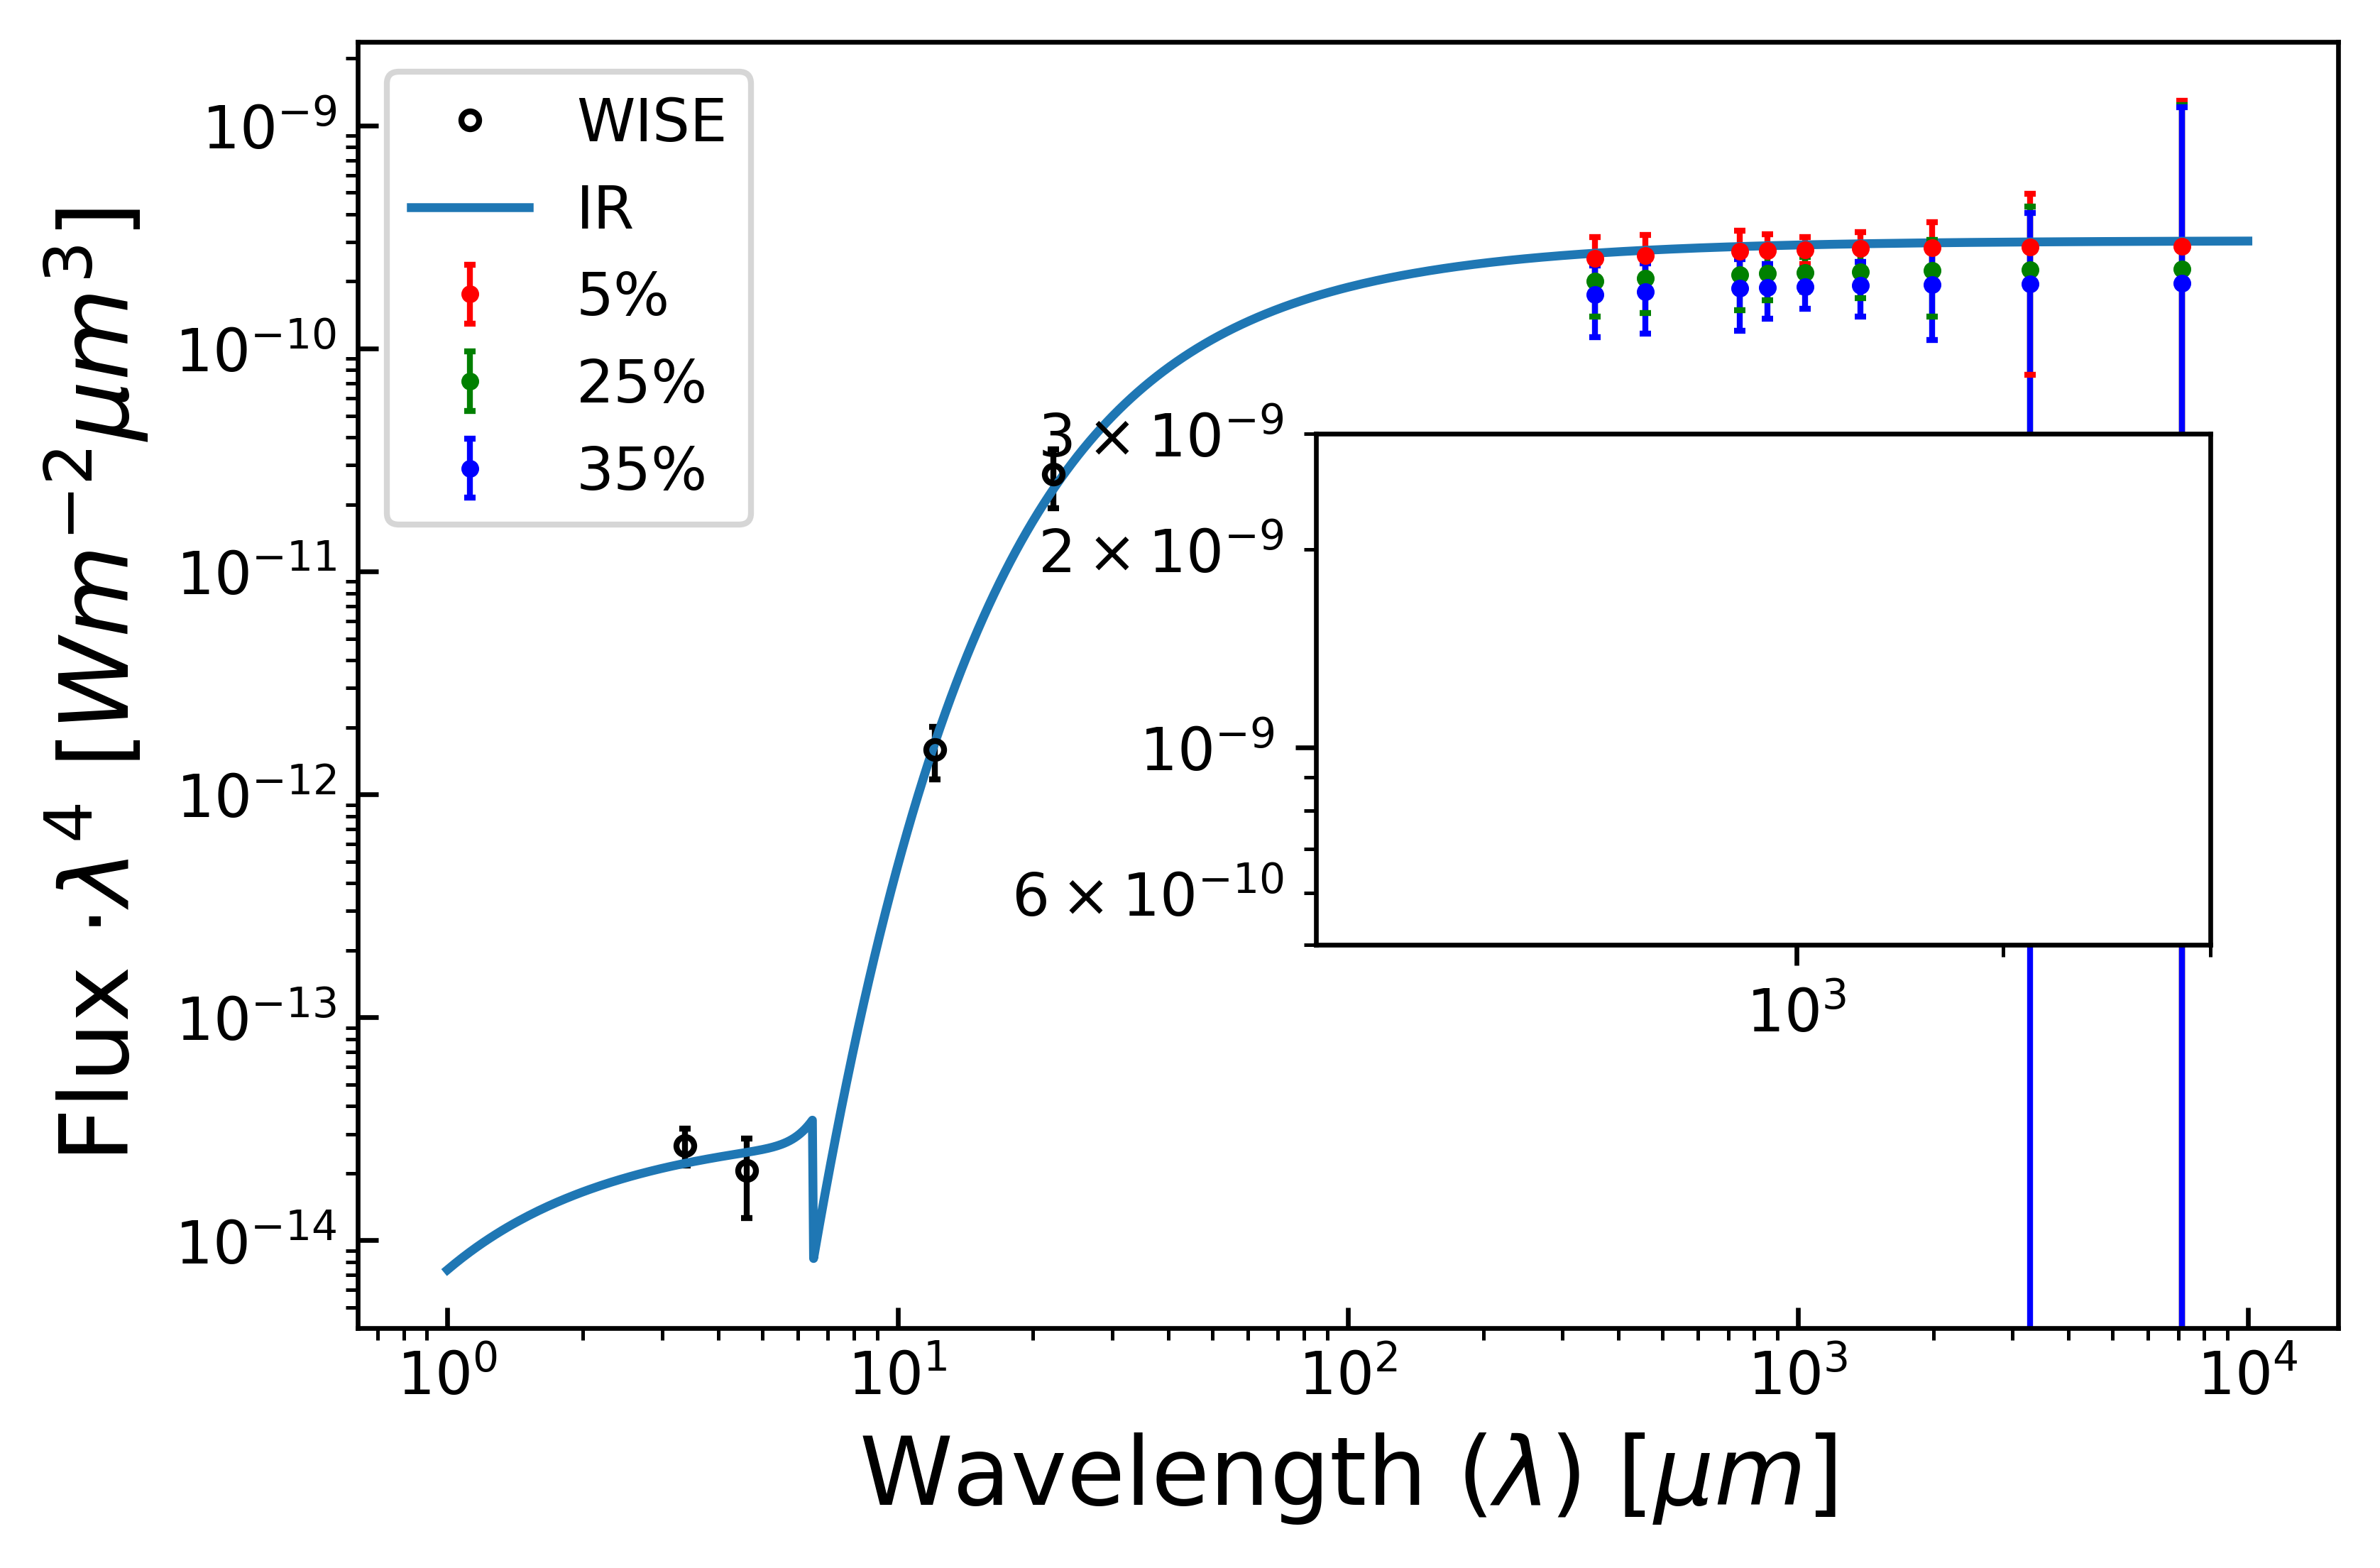

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(1, 1, dpi=DPI)
plotObservations(obs, data, spectral= 'lambda4', ax=ax, plotMedian=True, 
                 plotKwargs={"c" : "k", "fmt":"o", "markerfacecolor" : "none", "ms": 3, "capsize" : 1,
                 "elinewidth" : 1}, label = "WISE")
for code in dataDict.keys():
    freqs_for_plot, SED_for_plot = plotSED(SEDs[code], spectral = 'lambda4',ax=ax, plotKwargs={"label": code})
    
from astropy import units as u
atlast_freqs = np.array([42, 91.5, 151, 217.5, 288.5, 350, 403, 654, 845.4])*u.GHz
atlast_wavs = atlast_freqs.to(u.m, equivalencies=u.spectral())
atlast_fluxes = atlastInterp(atlast_wavs.value)
atlast_errs = [6.6, 6.5, 7.14, 9.22, 11.91, 23.59, 39.98, 98.86, 162.51]*u.uJy #Per hour sensitivty from Di Mascolo 2024

atlast_errs *= np.sqrt(60/60) #One hour to two minutes err conversion

#flags = np.where((np.array(atlast_freqs) < 600))[0]
#atlast_errs *= 20 #100 sigma bars bby

atlast_errs_units = np.zeros(len(atlast_errs))
for i in range(len(atlast_errs_units)):
    atlast_errs_units[i] = ((2.99792458e+14 * atlast_errs[i].to(u.W*u.m**-2*u.Hz**-1)).value / (atlast_wavs[i].to(u.um)**2).value)
    
    
atlast_errs_units *= (atlast_wavs.to(u.um).value)**4   
m_to_mum = 1e6


ax.errorbar(atlast_wavs.value*m_to_mum, 
            0.95*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            ms=2,
            capsize=1,
            elinewidth=1, 
            c = 'r',
            label = '5%')

ax.errorbar(atlast_wavs.value*m_to_mum, 
            0.75*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            ms=2,
            capsize=1,
            elinewidth=1,
            c = 'g',
            label = '25%')
ax.errorbar(atlast_wavs.value*m_to_mum, 
            0.65*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            ms=2,
            capsize=1,
            elinewidth=1,
            c = 'b',
            label = '35%')

"""
ax.errorbar(act_freqs.to(u.um).value, 
            act_flux_units, 
            act_errs_units, 
            fmt='o',
            c="k",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = 'ACT')
"""

a = plt.axes([0.5, 0.35, .35, .3])
a.errorbar(atlast_wavs.value*m_to_mum, 
            0.95*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            c="r",
            ms=2,
            capsize=1,
            elinewidth=1,
            label='5%'
        )
a.errorbar(1.1*atlast_wavs.value*m_to_mum, 
            0.75*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            c="b",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = '25%',
        )
a.errorbar(1.2*atlast_wavs.value*m_to_mum, 
            0.65*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            c="g",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = '35%'
          )
"""

a.errorbar(act_freqs.to(u.um).value, 
            act_flux_units, 
            act_errs_units, 
            fmt='o',
            c="k",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = 'ACT')
"""

a.plot(freqs_for_plot, SED_for_plot)

a.set_xlim(2e2,2e3)
a.set_ylim(5e-10, 3e-9)
a.set_xscale('log')
a.set_yscale('log')
a.set_xticks([1e3, 2e3, 4e3], [1e3, 2e3, 4e3])
locs_x = np.array([act_freqs.to(u.um).value[0], act_freqs.to(u.um).value[1], act_freqs.to(u.um).value[-1]])
locs_y = np.array([act_flux_units[0], act_flux_units[1], act_flux_units[2]])
#plt.annotate(['f090', 'f150', 'f220'], (locs_x, locs_y),(locs_x, locs_y), 
#         arrowprops=dict(facecolor='black', shrink=0.05))
#plt.yticks([])

#mark_inset(ax, a, loc1=2, loc2=1, fc="none", ec="0.5")

ax.legend()
#plt.savefig('./plots/atlast_60min_Badillo.pdf')

# SO Plot

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

%load_ext autoreload
%autoreload 2

from atm import modifyErrors
from atm import multiFit
from atm.models import NEATM
from atm.obs import WISE
from atm.analysis import calcMagChi2
from atm.analysis import calcMagReducedChi2
from atm.analysis import postProcess
from atm.functions import calcFluxLambdaSED
from atm.plotting import plotObservations
from atm.plotting import plotSED

from asteroid_utils_atm import asteroid, get_desig

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
m_to_mum = 1e6 # simple conversion from m to micron
km_to_m = 1e3 # conversion km to m

DPI = 600
SAVE_DIR = "../plots/"
FORMAT = "pdf"

SAVE_FIGS = False

# Grab observations and additional data
con = sql.connect("/home/r/rbond/jorlo/dev/atm/atm_data/paper1/sample.db")
#con = sql.connect('/home/r/rbond/jorlo/dev/atm/atm_data/paper1/runs/sigma10/atm_results_run0.db')
observations = pd.read_sql("""SELECT * FROM observations""", con)
additional = pd.read_sql("""SELECT * FROM additional""", con)

# Only keep clipped observations
observations = observations[observations["keep"] == 1]
additional = additional[additional["obs_id"].isin(observations["obs_id"].values)]

# Remove missing H value, G value objects... 
observations = observations[~observations["designation"].isin(['2010 AJ104', '2010 BM69', '2010 DZ64', '2010 EL27', '2010 EW144',
   '2010 FE82', '2010 FJ48', '2010 HK10', '2010 LE80'])]

# Convert phase angle to radians
observations["alpha_rad"] = np.radians(observations["alpha_deg"])
ran_override = False

# Initialize observatory 
obs = WISE()

In [3]:
if ran_override == False:
    observations = modifyErrors(observations, obs, sigma=0.15)
    ran_override = True
else:
    print("No need to run this again!")

In [4]:
asteroid_name = "2005 YU55"
runDict = {}
dataDict = {}

fitConfig = {
        "chains" : 20,
        "samples" : 3000,
        "burnInSamples": 500,
        "threads": 20,
        "scaling": 0.01,
        "plotTrace" : True,
        "plotCorner" : True,
        "progressBar" : True,
        "figKwargs" : {"dpi" : 300}
    }

data = observations[observations["designation"].isin([asteroid_name])]
data_additional = additional[additional["obs_id"].isin(data["obs_id"].values)] # Contains published magnitudes

In [21]:
str(3753) in set(observations["designation"])

False

In [10]:
dataDict["IR"] = data.copy()
dataDict["IR"]["eps"] = np.ones(len(data)) * 0.9
dataDict["IR"]["p_W3"] = np.ones(len(data)) * 0.0
dataDict["IR"]["p_W4"] = np.ones(len(data)) * 0.0

runDict["IR"] = {
    "fitParameters" : ["logT1", "logD", "p_W1W2"],
    "emissivitySpecification" : None,
    "albedoSpecification": {
                "p_W1W2" : ["W1", "W2"],
                "p_W3" : ["W3"],
                "p_W4" : ["W4"]},
    "fitFilters" : "all",
    "columnMapping" : {
                "obs_id" : "obs_id",
                "designation" : "designation",
                "exp_mjd" : "mjd",
                "r_au" : "r_au",
                "delta_au" : "delta_au",
                "alpha_rad" : "alpha_rad",
                "eps" : "eps",
                "p" : ["p_W3", "p_W4"],
                "G" : "G",
                "logT1" : None,
                "logD" : None,
                "flux_si" : ["flux_W1_si", "flux_W2_si", "flux_W3_si", "flux_W4_si"],
                "fluxErr_si" : ["fluxErr_W1_si", "fluxErr_W2_si", "fluxErr_W3_si", "fluxErr_W4_si"],  
                "mag" : ["mag_W1", "mag_W2", "mag_W3", "mag_W4"],
                "magErr" : ["magErr_W1", "magErr_W2", "magErr_W3", "magErr_W4"]
    }
}

4
Calculating number of fits to run...
Fit code: IR
Number of fits to run: 1

Total number of fits to run: 1

Starting fit code: IR

Fitting object 4 (1/1)...
Fit number: 1/1



/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

Fitting 4 with NEATM...
Fit Code: IR
Fit Parameters: ['logT1', 'logD', 'p_W1W2']
Emissivity Parameters: ['eps']
Emissivity Specification: None
Albedo Parameters: ['p_W1W2' 'p_W3' 'p_W4']
Albedo Specification: {'p_W1W2': ['W1', 'W2'], 'p_W3': ['W3'], 'p_W4': ['W4']}
Number of observations: 5
Chains: 20
Samples per Chain: 3500
Burn-in Samples: 500
Effective Samples per Chain: 3000
Threads: 20
eps  __str__ = 0.9


Multiprocess sampling (20 chains in 20 jobs)
CompoundStep
>Metropolis: [p_W1W2]
>Metropolis: [logT1]
>Metropolis: [logD]
Sampling 20 chains, 0 divergences: 100%|██████████| 70000/70000 [00:47<00:00, 1488.28draws/s]
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Found best fit parameters:
 logT1:  2.606 +- 0.008
 logD:   5.681 +- 0.022
 p_W1W2: 0.554 +- 0.069


/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

Total time: 207.50 seconds
Done.

Completed. Traces have the desired number of samples.
Done.

[  designation  model code parameter  median  sigmaG   mean     sd  hdi_3%  \
0           4  NEATM   IR     logT1   2.606   0.008  2.631  0.114   2.587   
1           4  NEATM   IR      logD   5.681   0.022  5.593  0.391   5.630   
2           4  NEATM   IR    p_W1W2   0.554   0.069  0.655  0.542   0.408   

   hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  ess_bulk  ess_tail  r_hat  
0    2.623      0.025    0.018      20.0    20.0      84.0      20.0   1.16  
1    5.732      0.087    0.062      20.0    20.0      85.0      20.0   1.16  
2    0.723      0.096    0.069      32.0    32.0     154.0      27.0   1.13  ]


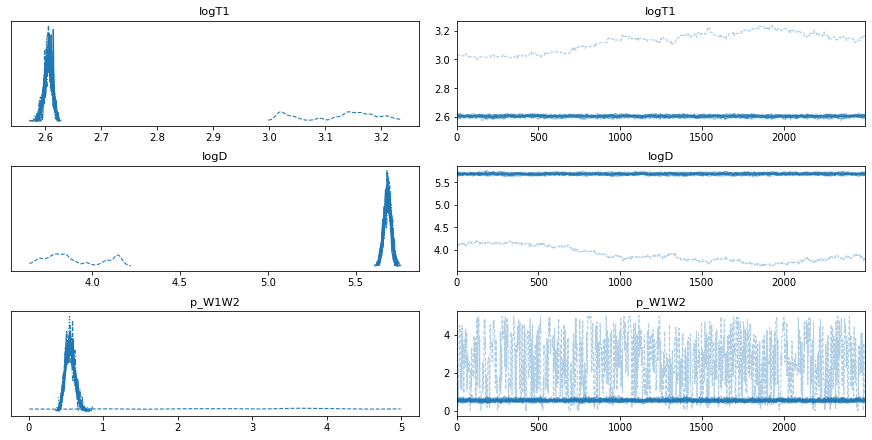

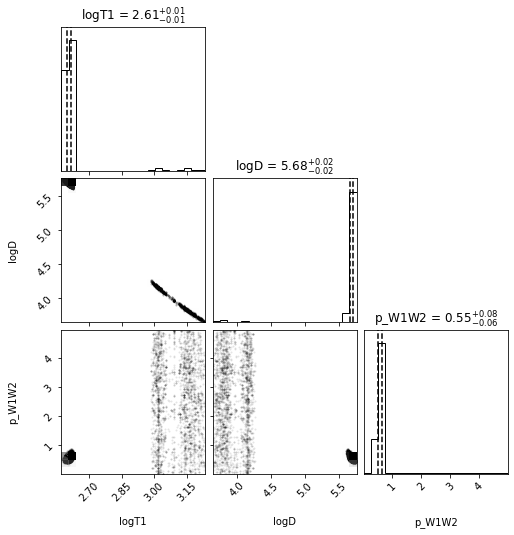

In [11]:
obs = WISE()
print(asteroid_name)
model = NEATM(verbose=False, tableDir='/home/r/rbond/jorlo/dev/atm/atm/models/tables/neatm/')

summary, model_observations = multiFit(model, obs, dataDict, runDict, fitConfig)

In [35]:
lambdaRange=[1.0e-6, 10e-5]
lambdaNum=2500
lambdaEdges=[3.9e-6, 6.5e-6, 18.5e-6]

SEDs = {}
for code in runDict.keys():
    SEDs[code] = calcFluxLambdaSED(model, obs, dataDict[code], 
                                   summary=summary[summary["code"] == code], 
                                   fitParameters=runDict[code]["fitParameters"],
                                   emissivitySpecification=runDict[code]["emissivitySpecification"],
                                   albedoSpecification=runDict[code]["albedoSpecification"],
                                   columnMapping=runDict[code]["columnMapping"],
                                   lambdaRange=lambdaRange,
                                   lambdaNum=lambdaNum,
                                   lambdaEdges=lambdaEdges,
                                   linearInterpolation=False)
    
lambdaRange=[10e-5, 2e-2]
lambdaNum=2500
lambdaEdges=[3.9e-6, 6.5e-6, 18.5e-6]

SEDs_ACT = {}
for code in runDict.keys():
    SEDs_ACT[code] = calcFluxLambdaSED(model, obs, dataDict[code], 
                                   summary=summary[summary["code"] == code], 
                                   fitParameters=runDict[code]["fitParameters"],
                                   emissivitySpecification=runDict[code]["emissivitySpecification"],
                                   albedoSpecification=runDict[code]["albedoSpecification"],
                                   columnMapping=runDict[code]["columnMapping"],
                                   lambdaRange=lambdaRange,
                                   lambdaNum=lambdaNum,
                                   lambdaEdges=lambdaEdges,
                                   linearInterpolation=False)

/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:34: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:81: RuntimeWarning: 
                Potentially violating Kirchoff's law!
                Insure your albedo specification is compatible with your emissivity specification.
                You can also define one and set the other to 'auto'.
  warnings.warn("""
/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/helpers.py:103: RuntimeWarning: Potentially violating Kirchoff's law!
  warnings

In [36]:
for code in SEDs.keys():
    SEDs[code] = SEDs[code].append(SEDs_ACT[code])
    
from scipy import interpolate
x = SEDs_ACT['IR']['lambda']
y = SEDs_ACT['IR']['flux']
atlastInterp = interpolate.interp1d(x, y, kind='linear')
id_num = 0

desig, name, semimajor = get_desig(id_num)
flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
print(name)


####################################################################
#              Uncomment "add_run"s to plot the runs               #
####################################################################

with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
    vesta_dict = pk.load(f)
    
ast = asteroid(name, desig, vesta_dict, semimajor = semimajor, show_plot= True,  obs=WISE()) 
ast.normalize_act_fluxes(write = False, verbose = False)

flux_pa4_150, err_pa4_150 = vesta_dict['night']['pa4']['150']['flux'], vesta_dict['night']['pa4']['150']['var']
flux_pa4_220, err_pa4_220 = vesta_dict['night']['pa4']['220']['flux'], vesta_dict['night']['pa4']['220']['var']

flux_pa5_090, err_pa5_090 = vesta_dict['night']['pa5']['090']['flux'], vesta_dict['night']['pa5']['090']['var']
flux_pa5_150, err_pa5_150 = vesta_dict['night']['pa5']['150']['flux'], vesta_dict['night']['pa5']['150']['var']

flux_pa6_090, err_pa6_090 = vesta_dict['night']['pa6']['090']['flux'], vesta_dict['night']['pa6']['090']['var']
flux_pa6_150, err_pa6_150 = vesta_dict['night']['pa6']['150']['flux'], vesta_dict['night']['pa6']['150']['var']

act_fluxes = [flux_pa5_090, flux_pa6_090, flux_pa4_150, flux_pa5_150, flux_pa6_150, flux_pa4_220]*u.mJy
act_errs = [err_pa5_090, err_pa6_090, err_pa4_150, err_pa5_150, err_pa6_150, err_pa4_220]*u.mJy
act_freqs = np.array([0.00333103, 0.00333103, 0.00199862, 0.00199862, 0.00199862, 0.00136269])*u.m

act_flux_units = np.zeros(len(act_fluxes))
act_errs_units = np.zeros(len(act_fluxes))
for i in range(len(act_fluxes)):
    act_flux_units[i] = ((2.99792458e+14 * act_fluxes[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)
    act_errs_units[i] = ((2.99792458e+14 * act_errs[i].to(u.W*u.m**-2*u.Hz**-1)).value / (act_freqs[i].to(u.um)**2).value)

act_flux_units *= (act_freqs.to(u.um).value)**4
act_errs_units *= (act_freqs.to(u.um).value)**4

Vesta


/gpfs/fs0/project/r/rbond/jorlo/virtual_envs/atm/lib/python3.8/site-packages/atm-1.1.dev31+g0523600.d20220718-py3.8.egg/atm/plotting/fluxes.py:85: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.errorbar(obs.filterEffectiveLambdas[i] * m_to_mum, y, yerr = yerr,
/tmp/ipykernel_69163/916480920.py:120: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  a.set_xticks([1e3, 2e3, 4e3], [1e3, 2e3, 4e3])


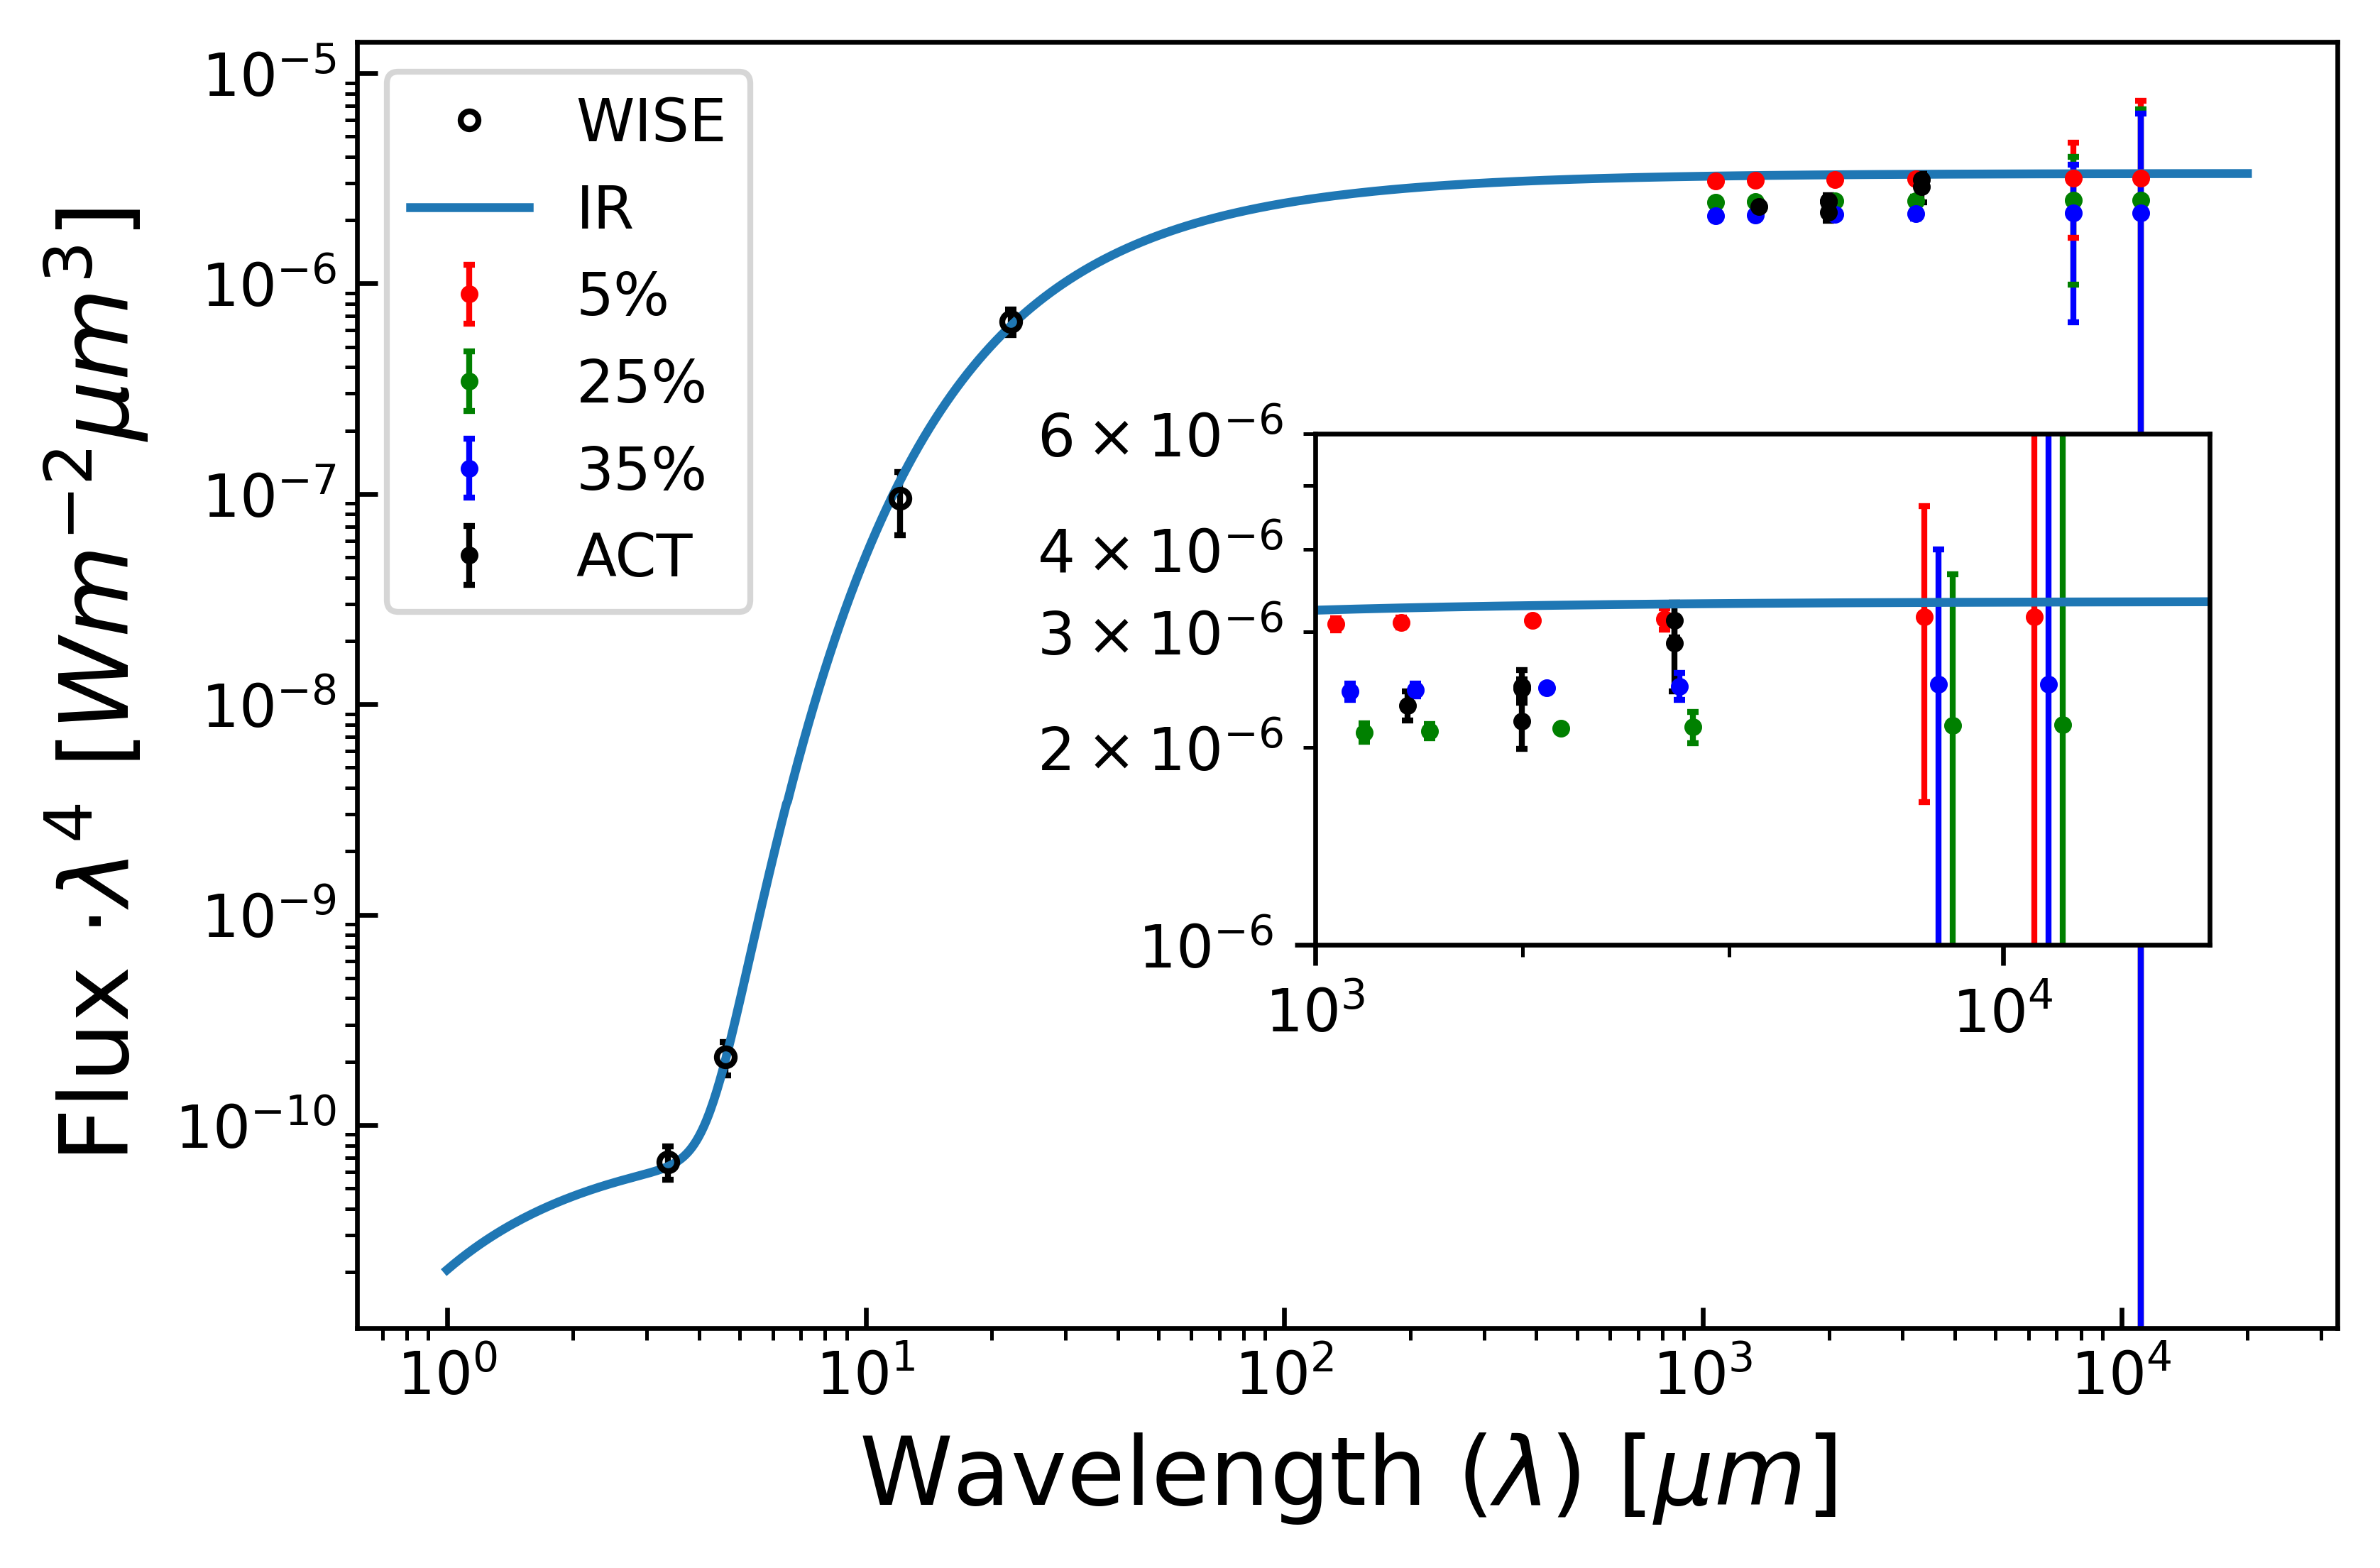

In [37]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(1, 1, dpi=DPI)
plotObservations(obs, data, spectral= 'lambda4', ax=ax, plotMedian=True, 
                 plotKwargs={"c" : "k", "fmt":"o", "markerfacecolor" : "none", "ms": 3, "capsize" : 1,
                 "elinewidth" : 1}, label = "WISE")
for code in dataDict.keys():
    freqs_for_plot, SED_for_plot = plotSED(SEDs[code], spectral = 'lambda4',ax=ax, plotKwargs={"label": code})
    
from astropy import units as u
atlast_freqs = np.array([27, 39, 93, 145, 225, 280])*u.GHz
atlast_wavs = atlast_freqs.to(u.m, equivalencies=u.spectral())
atlast_fluxes = atlastInterp(atlast_wavs.value)
atlast_errs = [2.3, 1.7, 0.75, .094, 2.0, 4.0]*u.mJy #Per hour sensitivty from Di Mascolo 2024

atlast_errs *= 5 #One hour to two minutes err conversion
act_errs_units*=5
#flags = np.where((np.array(atlast_freqs) < 600))[0]
#atlast_errs *= 20 #100 sigma bars bby

atlast_errs_units = np.zeros(len(atlast_errs))
for i in range(len(atlast_errs_units)):
    atlast_errs_units[i] = ((2.99792458e+14 * atlast_errs[i].to(u.W*u.m**-2*u.Hz**-1)).value / (atlast_wavs[i].to(u.um)**2).value)
    
    
atlast_errs_units *= (atlast_wavs.to(u.um).value)**4   
m_to_mum = 1e6


ax.errorbar(atlast_wavs.value*m_to_mum, 
            0.95*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            ms=2,
            capsize=1,
            elinewidth=1, 
            c = 'r',
            label = '5%')

ax.errorbar(atlast_wavs.value*m_to_mum, 
            0.75*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            ms=2,
            capsize=1,
            elinewidth=1,
            c = 'g',
            label = '25%')
ax.errorbar(atlast_wavs.value*m_to_mum, 
            0.65*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            ms=2,
            capsize=1,
            elinewidth=1,
            c = 'b',
            label = '35%')


ax.errorbar(act_freqs.to(u.um).value, 
            act_flux_units, 
            act_errs_units, 
            fmt='o',
            c="k",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = 'ACT')

a = plt.axes([0.5, 0.35, .35, .3])
a.errorbar(atlast_wavs.value*m_to_mum, 
            0.95*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            c="r",
            ms=2,
            capsize=1,
            elinewidth=1,
            label='5%'
        )
a.errorbar(1.05*atlast_wavs.value*m_to_mum, 
            0.75*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            c="b",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = '25%',
        )
a.errorbar(1.1*atlast_wavs.value*m_to_mum, 
            0.65*(atlast_wavs.value * m_to_mum)**4 * 1/m_to_mum*atlast_fluxes, 
            atlast_errs_units, 
            fmt='o',
            c="g",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = '35%'
          )


a.errorbar(act_freqs.to(u.um).value, 
            act_flux_units, 
            act_errs_units, 
            fmt='o',
            c="k",
            ms=2,
            capsize=1,
            elinewidth=1,
            label = 'ACT')


a.plot(freqs_for_plot, SED_for_plot)

a.set_xlim(2e3,2e4)
a.set_ylim(1e-6, 6e-6)
a.set_xscale('log')
a.set_yscale('log')
a.set_xticks([1e3, 2e3, 4e3], [1e3, 2e3, 4e3])
locs_x = np.array([act_freqs.to(u.um).value[0], act_freqs.to(u.um).value[1], act_freqs.to(u.um).value[-1]])
locs_y = np.array([act_flux_units[0], act_flux_units[1], act_flux_units[2]])
#plt.annotate(['f090', 'f150', 'f220'], (locs_x, locs_y),(locs_x, locs_y), 
#         arrowprops=dict(facecolor='black', shrink=0.05))
#plt.yticks([])

#mark_inset(ax, a, loc1=2, loc2=1, fc="none", ec="0.5")

ax.legend()
plt.savefig('./plots/SO_Vesta.pdf', dpi = 600)
plt.savefig('./plots/SO_Vesta.png', dpi = 600)